# Intro and Exploration

Welcome to another exploratory data analysis! For this project, I wanted to take a look at the Michelin Guide. As you may already know, the Michelin Guide originates from the Michelin tire company in France where the guide was given to customers that purchased tires from the company. As time went on, the guide transformed into a symbol of prestige--including the hottest and best restaurants around the world by giving them four types of distinctions: One, Two, and Three Michelin Stars and the Bib Gourmand. Here's a simple breakdown of what each of these distinctions means:

  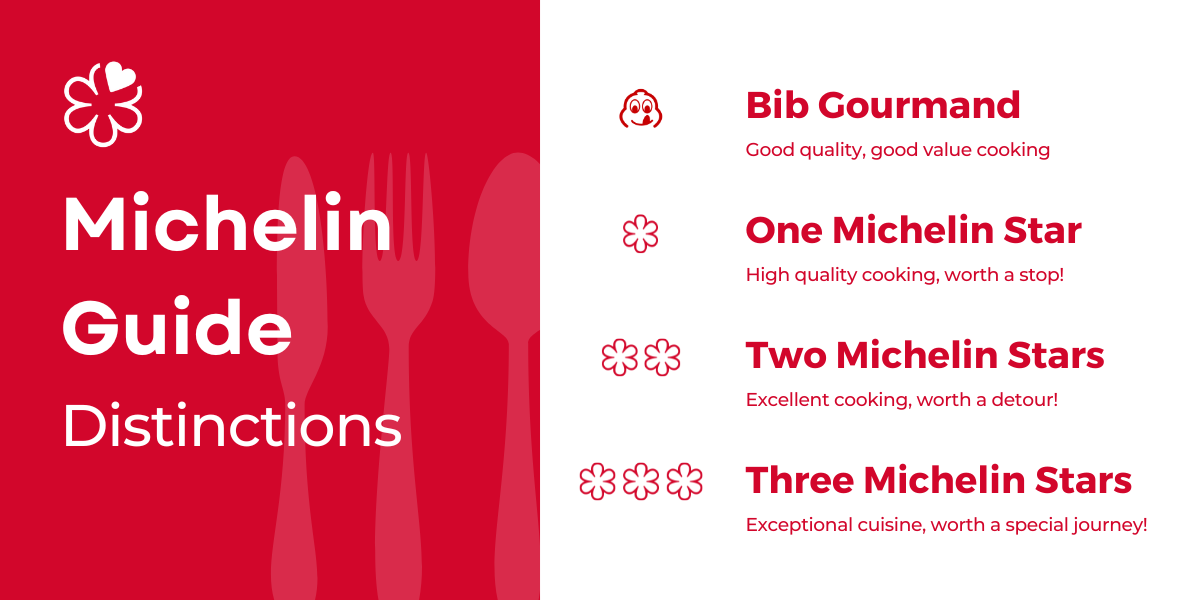 

Also on the [Michelin Guide](https:\guide.michelin.com\us\en\restaurants) is another distinction that doesn't have any special markings. The Michelin Guide remarks these restaurants that have "good cusine at reasonable prices," but it is not as highly regarded as the other distinctions on the list. As sommeone that loves food with a passion, I would love nothing more than to try all of the places on the Michelin Guide and my progress so far? Only one place. Just a few restaurants short from my goal right? More realistically, I would like to try a two and three Michelin star restaurant to see what the differences would be like. In this exploratory data analysis, I am going to take a look at all the restaurants on the Michelin Guide (excluding the restaurants without a distinction) and seeing if there are countries with more awards, types of popular cuisines, average price points for each distinction, and what might lead to higher Michelin stars for a restaurant. To help guide the rest of the EDA, I wanted to cover these questions as I proceed:

- Which countries has the most total distinctions?
- What types of cuisines are the most popular? Which get the highest distinctions?
- What are the average prices like for each type of distinction?
- Which restaurants are most "bang for your buck"?
- Do prices affect the level of distinction earner? With the overarching goal of finding what the ideal profile for higher distinctions would look like. What are some elements that lead to a higher distinction? For this EDA, I want to improve my analysis methodology and use different platforms such as Azure Data Studio in conjuntion with Microsoft SQL Server Management Studio (SSMS) and Power BI to build dashboards and visualize my data.

## The Dataset

I found this dataset on Kaggle from contributor Jerry Ng. This dataset was created a month ago where Jerry Ng utilized Go Colly to scrape information from the official [Michelin Guide](https:\guide.michelin.com\us\en\restaurants). The dataset features the basic information for all of the restaurants featured: Name, Address, Location, MinPrice, MaxPrice, Currency, Cuisine, Longitude and Latitude, Url, and WebsiteUrl, Award, and FacilitiesAndServices. Let's take a look at what the dataset looks like from first glance.

In [2]:
SELECT TOP 10 * FROM [MichelinStars].[dbo].[michelin_guide]

(10 rows affected)

Total execution time: 00:00:00.010

Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,Url,WebsiteUrl,Award,FacilitiesAndServices
Le Palais,"17F, Palais de Chine Hotel, 3, Section 1, Chengde Road, Datong District, Taipei, 103, Taipei & Taichung",Taipei,6000,6000,TWD,Cantonese,121.51696014404297,25.049070358276367,https://guide.michelin.com/en/taipei-region/taipei/restaurant/le-palais,https://www.palaisdechinehotel.com/en/index.php,3 MICHELIN Stars,"Air conditioning,American Express credit card,Car park,China UnionPay,Credit card / Debit card accepted,JCB,Mastercard credit card,Visa credit card,Wheelchair access"
Les Amis,"Shaw Centre, #01-16, 1 Scotts Road, 228208, Singapore",Singapore,225,460,SGD,French,103.83203887939453,1.3062599897384644,https://guide.michelin.com/en/singapore-region/singapore/restaurant/les-amis,https://www.lesamis.com.sg/,3 MICHELIN Stars,"Air conditioning,American Express credit card,Car park,China UnionPay,Credit card / Debit card accepted,Diners Club credit card,JCB,Mastercard credit card,Particularly interesting wine list,Restaurant offering vegetarian menus,Valet parking,Visa credit card,Wheelchair access"
Odette,"National Gallery, #01-04, 1 St. Andrew's Road (entrance via Supreme Court wing's foyer), 178957, Singapore",Singapore,298,428,SGD,French Contemporary,103.85160064697266,1.2896459102630615,https://guide.michelin.com/en/singapore-region/singapore/restaurant/odette,http://www.odetterestaurant.com,3 MICHELIN Stars,"Air conditioning,American Express credit card,Car park,Credit card / Debit card accepted,Diners Club credit card,JCB,Maestro,Mastercard credit card,Particularly interesting wine list,Restaurant offering vegetarian menus,Visa credit card,Wheelchair access"
Zén,"41 Bukit Pasoh Road, 089855, Singapore",Singapore,580,580,SGD,European Contemporary,103.84042358398438,1.2796270847320557,https://guide.michelin.com/en/singapore-region/singapore/restaurant/zen,http://www.restaurantzen.com,3 MICHELIN Stars,"Air conditioning,American Express credit card,Credit card / Debit card accepted,Mastercard credit card,Particularly interesting wine list,Restaurant offering vegetarian menus,Visa credit card"
Maaemo,"Dronning Eufemias gate 23, Oslo, 0194, Norway",Oslo,3500,3500,NOK,"Modern Cuisine, Creative",10.758636474609375,59.907527923583984,https://guide.michelin.com/en/oslo-region/oslo/restaurant/maaemo-1194933,http://www.maaemo.no,3 MICHELIN Stars,"Air conditioning,American Express credit card,Credit card / Debit card accepted,Mastercard credit card,Visa credit card"
Geranium,"Per Henrik Lings Allé, Parken National Stadium, Copenhagen, 2100 Ø, Denmark",Copenhagen,3200,3200,DKK,"Creative, Contemporary",12.572528839111328,55.70408630371094,https://guide.michelin.com/en/capital-region/copenhagen/restaurant/geranium,https://www.geranium.dk/,3 MICHELIN Stars,"Air conditioning,American Express credit card,Car park,Credit card / Debit card accepted,Great view,Mastercard credit card,Particularly interesting wine list,Restaurant offering vegetarian menus,Visa credit card,Wheelchair access"
noma,"Refshalevej 96, Copenhagen, 1432 K, Denmark",Copenhagen,3000,3000,DKK,Creative,12.610617637634277,55.683311462402344,https://guide.michelin.com/en/capital-region/copenhagen/restaurant/noma,https://noma.dk/,3 MICHELIN Stars,"American Express credit card,Credit card / Debit card accepted,Diners Club credit card,Garden or park,Great view,Mastercard credit card,Visa credit card,Wheelchair access"
Frantzén,"Klara Norra Kyrkogata 26, Stockholm, 111 22, Sweden",Stockholm,4200,4200,SEK,Modern Cuisine,18.059789657592773,59.33417892456055,https://guide.michelin.com/en/stockholm-region/stockholm/restaurant/frantzen,https://www.restaurantfrantzen.com/,3 MICHELIN Stars,"Air conditioning,American Express credit card,Credit card / Debit card accepted,Diners Club credit card,Mastercard credit card,Particularly interesting wine list,Visa credit card"
Inter Scaldes,"Zandweg 2, Kruiningen, 4416 NA, Netherlands",Kruiningen,165,380,EUR,Modern Cuisi

In [23]:
/* TOTAL ROW COUNT VS. OFFICIAL WEBSITE COUNT */
SELECT COUNT(*) AS total_rows FROM [MichelinStars].[dbo].[michelin_guide]

(1 row affected)

Total execution time: 00:00:00.002

total_rows
6586


Right off the bat, I noticed a couple of things:
- There are city names but no column for countries. Since the dataset also provides coordinates, it might be helpful to create a column to see what countries the restaurants are in for when we build out dashboards featuring geographic representations. 
- The names of the restaurants are very unique as they are in different languages. This is something I should keep note of as I write out queries as syntax is significant here. 
- The currencies are distinct and there's no way to compare the prices on the same plane unless we create a column that calculates the prices in a singular currency (USD). However, this will be complex since currency rates fluctuate often. Thus, I will find a rate that reflects November 2022's exchange rates. 
- Some cuisines are listed as typical types of cuisines one would see-such as Korean, American, Spanish, Japanese. However, there are some entries in this table that aren't as commonly seen, such as "Creative" or "Modern Cuisine."
- Current prices might not reflect what is on the list since it has been some time since the collection period.
- There are a total of 6,586 entries in the database since the collection. Upon verifying on the Michelin Guide website, there are 6,681 restaurants at the time of research (November 2022). This must be taken into account as there could be restaurants that might sway the data of the disinctions and awards they received.
To create a new column with the correct Countries, I utilized Excel for simple data cleaning and utilized Flash Fill to quickly generate a list of countries based on the Address column. Since I updatethe table with a new column, I would have to make the changes in SSMS to update it in the database. I also wanted to clean the data in one go so that I would only have to update the table once. Looking at the database, I also noticed a number of NULLS in some of the columns. 
Since not all columns are going to help contribute to our analysis, I wanted to zoom in to the columns that are necessary to the analysis: Name, Address, Location, MinPrice, MaxPrice, Currency, Cuisine, Longitude and Latitude, and Award. The rest of the columns, Url, WebsiteUrl, and FacilitiesAndServices, would not be needed for this analysis, thus it is safe to drop those columns. To ensure our dataset has all the necessary fields for the required columns, I will also drop NULLS from Name, MinPrice, MaxPrice, Latitude and Longitude, and Award.
### **Data Cleaning**

In [3]:
/* FINDING NULLS WIHTIN DATASET FOR REQUIRED COLUMNS */
DELETE FROM [MichelinStars].[dbo].[michelin_guide] WHERE 
Name IS NULL OR MinPrice IS NULL OR MaxPrice IS NULL OR Latitude IS NULL OR Longitude IS NULL OR Award IS NULL

/* REPRINTING TO SEE RESULTS */
SELECT * FROM [MichelinStars].[dbo].[michelin_guide] WHERE Name IS NULL OR MinPrice IS NULL OR MaxPrice IS NULL OR Latitude IS NULL OR Longitude IS NULL OR Award IS NULL

/* FINDING DUPLICATES IN DATA */ 
SELECT
    (SELECT DISTINCT COUNT(*) FROM [MichelinStars].[dbo].[michelin_guide]) AS distinct_row,
    (SELECT COUNT(*) FROM [MichelinStars].[dbo].[michelin_guide]) AS total_row 

--! From an initial count of 6,586 to 6,525, there were some NULL rows that we had to remove to proceed with the data analysis.

(0 rows affected)

(0 rows affected)

(1 row affected)

Total execution time: 00:00:00.040

Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,Url,WebsiteUrl,Award,FacilitiesAndServices


distinct_row,total_row
6525,6525


I have an updated dataset on my server here, but I also have a list of Countries that I need to add to this list. I will need to repeat the cleaning process in Excel and upload the new dataset into the databse here under a new table name. After removing the NULLS from Excel, I confirmed that I had the same amount of rows compared to the post-cleaning situation as performed above. I uploaded the cleaned Excel CSV file into SSMS and had the changes reflect in the server, which can now be used here (in ADS).  Let's have a simple count of the rows in this table to ensure we are using the same database.

In [2]:
SELECT COUNT(*) FROM [MichelinStars].[dbo].[michelin_guide_11_2022]

(1 row affected)

Total execution time: 00:00:00.002

(No column name)
6525


Nice! Let's continue our preparation and understanding of the dataset before proceeding with the questions.

In [20]:
/* FINDING NUMBER OF RESTAURANTS PER DISTINCTION CATEGORY */ 
SELECT Award, COUNT(*) AS restaurant_count FROM [MichelinStars].[dbo].[michelin_guide_11_2022] GROUP BY Award ORDER BY restaurant_count

(4 rows affected)

Total execution time: 00:00:00.027

Award,restaurant_count
3 MICHELIN Stars,137
2 MICHELIN Stars,477
1 MICHELIN Star,2660
Bib Gourmand,3251


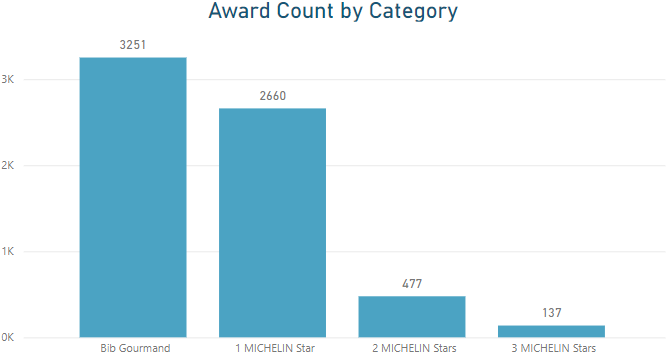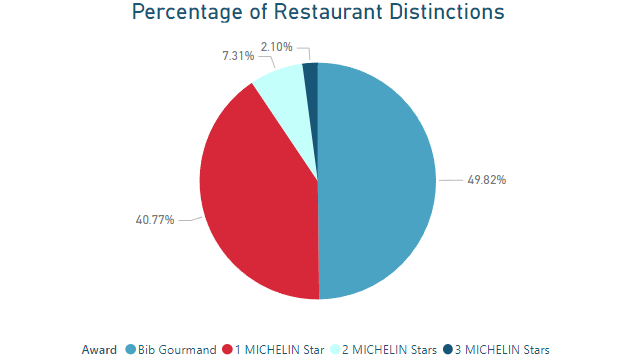  

As the graphics show, Bib Gourmand seems to be a reigning distinction where it represents almost half of the database. 1 Michelin Star also comes in second place with around 40% of the entries. However, as we look at the 2 and 3 Michelin Stars, we see that the values get smaller, which shows how rare it is to get higher and higher distinctions. Let's have a look at some of the most populous cuisines.

In [5]:
/* FINDING DISTINCT CUISINE TYPES IN DATABASE */ 
SELECT DISTINCT TOP 15 CUISINE FROM [MichelinStars].[dbo].[michelin_guide_11_2022]

(15 rows affected)

Total execution time: 00:00:00.010

CUISINE
Cantonese
French
French Contemporary
European Contemporary
"Modern Cuisine, Creative"
"Creative, Contemporary"
Creative
Modern Cuisine
Creative French
"American, French"


In [6]:
/* FINDING NUMBER OF CUISINES IN DATABASE */ 
SELECT TOP 15 Cuisine, COUNT(Cuisine) AS cuisine_count FROM [MichelinStars].[dbo].[michelin_guide_11_2022] GROUP BY Cuisine ORDER BY cuisine_count DESC

(15 rows affected)

Total execution time: 00:00:00.024

Cuisine,cuisine_count
Modern Cuisine,994
Creative,429
Japanese,295
Traditional Cuisine,229
French,174
Street Food,136
Italian,129
Cantonese,106
Classic Cuisine,95
Contemporary,95


Going off of the results, it seems that there are a lot of distinct cuisines. Not only do some cuisines feature just a single type of cuisine, some feature a variety and are very specific, such as "Portugese, Californian" or even "Traditional Cuisine, Cuisine from Franche-Comte." Since there are so many cuisines that have multiple regions or types of dishes, narrowing down the more popular cuisines will be hard, especially when the top cuisines are "Modern Cuisine," "Creative," or even "Street Food."
Thus as we proceed, there are number of things we must note as limitations to our EDA. 
- Food taste is an objective thing. While one critic may believe a restaurant is worthy of 2 Michelin Stars, another could classify it as 3 or even 1 Michelin Star. Thus, noting that tastes may vary from person to person is important as this does not define that a specific cuisine or restaurant is the "best" in the world. 
- Types of cuisine can increase the difficulty in classifying a restaurant to a specific frame. While some of the more popular cuisine counts feature singular cuisine types, we must note that classifying cuisines into a specific region or type of food would be really difficult. For example, in our case, French cuisine does not equate to Modern French. Contemporary cuisine is different from Modern cuisine. There's even a popular count that classifies restaurants as featuring "Regional Cuisine"
- There were some restaurants that had to be taken out of our analysis due to having null values. Those deleted restaurants could have attributed to the 3 Michelin Star count, which impacts our data since the count of those restaurants are so few. 
- Currency exchange rates fluctuate every second of the day. Thus, if we convert values, it could affect the average prices due to the amount of changes there are. To keep our data consistent, we would have to find currency exchange rates for the day when performing the queries.
Here are those different currencies. My next steps are to convert them to USD to simplify our analysis and compare apples to apples.

In [1]:
/* SEEING LIST OF DISTINCT CURRENCIES */ 
SELECT DISTINCT Currency FROM [MichelinStars].[dbo].[michelin_guide_11_2022]

(24 rows affected)

Total execution time: 00:00:00.064

Currency
CHF
KRW
HKD
RSD
SEK
CNY
JPY
THB
EUR
TWD


To proceed with the currency exchange, I will utilize [Xe.com](https://www.xe.com/) to convert the rates to USD. Here is a list of those currency rates in terms of how much one unit of the currency is in terms of USD. 

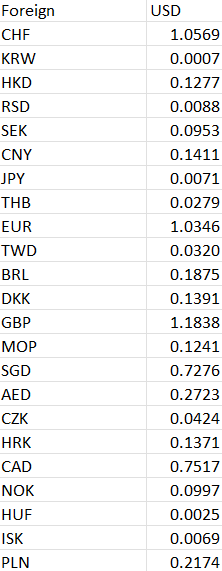

With this, we can set up a CASE statement to have the query run through all the queries and calculate the prices in USD for us. We'll start with the MinPrice column first then procced with MaxPrice and then create a new table from the entries.

In [27]:
/* CREATING NEW TABLE FOR MINPRICE WITH ALL ELEMENTS FROM ORIGINAL DATABASE BASED ON CURRENCY EXCHANGE RATES */ 
SELECT *, CASE
    WHEN Currency = 'CHF' THEN CEILING(MinPrice * 1.0569)
    WHEN Currency = 'KRW' THEN CEILING(MinPrice * .0007)
    WHEN Currency = 'HKD' THEN CEILING(MinPrice * .1277)
    WHEN Currency = 'RSD' THEN CEILING(MinPrice * .0088)
    WHEN Currency = 'SEK' THEN CEILING(MinPrice * .0953)
    WHEN Currency = 'CNY' THEN CEILING(MinPrice * .1411)
    WHEN Currency = 'JPY' THEN CEILING(MinPrice * .0071)
    WHEN Currency = 'THB' THEN CEILING(MinPrice * .0279)
    WHEN Currency = 'EUR' THEN CEILING(MinPrice * 1.3046)
    WHEN Currency = 'TWD' THEN CEILING(MinPrice * .0320)
    WHEN Currency = 'BRL' THEN CEILING(MinPrice * .1875)
    WHEN Currency = 'DKK' THEN CEILING(MinPrice * .1391)
    WHEN Currency = 'GBP' THEN CEILING(MinPrice * 1.1838)
    WHEN Currency = 'MOP' THEN CEILING(MinPrice * .1241)
    WHEN Currency = 'SGD' THEN CEILING(MinPrice * .7276)
    WHEN Currency = 'AED' THEN CEILING(MinPrice * .2723)
    WHEN Currency = 'CZK' THEN CEILING(MinPrice * .0424)
    WHEN Currency = 'HRK' THEN CEILING(MinPrice * .1371)
    WHEN Currency = 'CAD' THEN CEILING(MinPrice * .7517)
    WHEN Currency = 'NOK' THEN CEILING(MinPrice * .0097)
    WHEN Currency = 'HUF' THEN CEILING(MinPrice * .0025)
    WHEN Currency = 'ISK' THEN CEILING(MinPrice * .0069)
    WHEN Currency = 'PLN' THEN CEILING(MinPrice * .2174)
    ELSE MinPrice
    END AS MinPrice_USD
	INTO [MichelinStars].[dbo].[michelin_guide_cminprice]
FROM [MichelinStars].[dbo].[michelin_guide_11_2022]

(6525 rows affected)

Total execution time: 00:00:00.025

In [31]:
/* CREATING NEW TABLE FOR MINPRICE AND MAXPRICE WITH ALL ELEMENTS FROM MINPRICE TABLE BASED ON CURRENCY EXCHANGE RATES */ 
SELECT *, CASE
    WHEN Currency = 'CHF' THEN CEILING(MaxPrice * 1.0569)
    WHEN Currency = 'KRW' THEN CEILING(MaxPrice * .0007)
    WHEN Currency = 'HKD' THEN CEILING(MaxPrice * .1277)
    WHEN Currency = 'RSD' THEN CEILING(MaxPrice * .0088)
    WHEN Currency = 'SEK' THEN CEILING(MaxPrice * .0953)
    WHEN Currency = 'CNY' THEN CEILING(MaxPrice * .1411)
    WHEN Currency = 'JPY' THEN CEILING(MaxPrice * .0071)
    WHEN Currency = 'THB' THEN CEILING(MaxPrice * .0279)
    WHEN Currency = 'EUR' THEN CEILING(MaxPrice * 1.3046)
    WHEN Currency = 'TWD' THEN CEILING(MaxPrice * .0320)
    WHEN Currency = 'BRL' THEN CEILING(MaxPrice * .1875)
    WHEN Currency = 'DKK' THEN CEILING(MaxPrice * .1391)
    WHEN Currency = 'GBP' THEN CEILING(MaxPrice * 1.1838)
    WHEN Currency = 'MOP' THEN CEILING(MaxPrice * .1241)
    WHEN Currency = 'SGD' THEN CEILING(MaxPrice * .7276)
    WHEN Currency = 'AED' THEN CEILING(MaxPrice * .2723)
    WHEN Currency = 'CZK' THEN CEILING(MaxPrice * .0424)
    WHEN Currency = 'HRK' THEN CEILING(MaxPrice * .1371)
    WHEN Currency = 'CAD' THEN CEILING(MaxPrice * .7517)
    WHEN Currency = 'NOK' THEN CEILING(MaxPrice * .0097)
    WHEN Currency = 'HUF' THEN CEILING(MaxPrice * .0025)
    WHEN Currency = 'ISK' THEN CEILING(MaxPrice * .0069)
    WHEN Currency = 'PLN' THEN CEILING(MaxPrice * .2174)
    ELSE MaxPrice
    END AS MaxPrice_USD
    INTO [MichelinStars].[dbo].[michelin_guide_USD]
FROM [MichelinStars].[dbo].[michelin_guide_cminprice]

(6525 rows affected)

Total execution time: 00:00:00.027

To make our dataset easier to work with, we can drop the MinPrice and MaxPrice columns now that we have the MinPrice\_USD and MaxPrice\_USD columns. However, I want to keep the Currency column as opposed to dropping it to help us discern what the currency exchange components were.

In [39]:
ALTER TABLE [MichelinStars].[dbo].[michelin_guide_USD]
DROP COLUMN MinPrice, MaxPrice

Commands completed successfully.

Total execution time: 00:00:00.003

At the moment, I feel like this is unorthodox and that there are definitely better ways to create tables (temp tables) and use those values to add into the actual database without having to crowd the database. However, this puts us in a great place to proceed with the data analysis as we now have the currencies on one singular plane. Let's take a look at the prices and see what the average prices look like for the restaurants as well as the average prices for each distinction and average prices for each country.

In [7]:
SELECT TOP 20 *, CEILING((MinPrice_USD + MaxPrice_USD)/2) AS Avg_Price FROM [MichelinStars].[dbo].[michelin_guide_USD]

(20 rows affected)

Total execution time: 00:00:00.014

Name,Address,Country,Location,Currency,Cuisine,Longitude,Latitude,Award,MinPrice_USD,MaxPrice_USD,Avg_Price
Jua,"36 E. 22nd St., New York, 10010, USA",USA,New York,USD,"Korean, Korean Contemporary",-73.987447,40.740014,1 MICHELIN Star,135,135,135
Meadowsweet,"149 Broadway, New York, 11212, USA",USA,New York,USD,"Mediterranean Cuisine, American Contemporary",-73.963170,40.710354,1 MICHELIN Star,75,75,75
The River Café,"1 Water St., New York, 11201, USA",USA,New York,USD,Contemporary,-73.994298,40.703427,1 MICHELIN Star,54,175,115
Marea,"240 Central Park South, New York, 10019, USA",USA,New York,USD,"Seafood, Italian",-73.981068,40.767619,1 MICHELIN Star,63,150,107
odo,"17 W. 20th St., New York, 10011, USA",USA,New York,USD,"Japanese, Sushi",-73.992990,40.740704,1 MICHELIN Star,125,235,180
Le Coucou,"138 Lafayette St., New York, 10013, USA",USA,New York,USD,"French, Classic French",-74.000010,40.719162,1 MICHELIN Star,150,185,168
Kanoyama,"175 Second Ave., New York, 10003, USA",USA,New York,USD,"Japanese, Sushi",-73.986466,40.730657,1 MICHELIN Star,75,75,75
Cote,"16 W. 22nd St., New York, 10010, USA",USA,New York,USD,"Korean, Steakhouse",-73.991462,40.741423,1 MICHELIN Star,150,150,150
Ai Fiori,"400 Fifth Ave., New York, 10018, USA",USA,New York,USD,"Italian, French",-73.983570,40.750130,1 MICHELIN Star,110,175,143
Rezdôra,"27 E. 20th St., New York, 10003, USA",USA,New York,USD,"Italian, Emilian",-73.989008,40.739004,1 MICHELIN Star,65,100,83


In [44]:
/* FINDING AVERAGE FOR MINPRICE AND MAXPRICE BASED ON AWARD DISTINCTION CATEGORY */ 
SELECT Award, CEILING(AVG(MinPrice_USD)) AS MinPrice_Award, CEILING(AVG(MaxPrice_USD)) AS MinPrice_Award FROM [MichelinStars].[dbo].[michelin_guide_USD] GROUP BY Award

(4 rows affected)

Total execution time: 00:00:00.012

Award,MinPrice_Award,MinPrice_Award
Bib Gourmand,38,60
3 MICHELIN Stars,268,378
1 MICHELIN Star,107,174
2 MICHELIN Stars,174,269


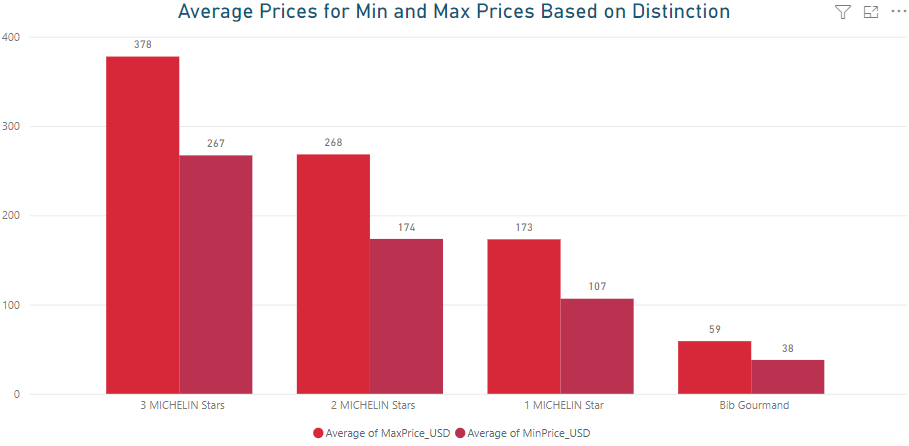

Interesting find as even though Bib Gourmand restaurants generally are more affordable, it seems that these restaurants are typically a step above casual restaurants where the price ranges from $15 - 25. However, we do see noticeable climbs in the average prices for the higher disticntions. One thing that I thought was interesting was how the high averages for the lower Michelin star awards was essentially the lower averages for the nxt ranking. From that pattern, it seems as if the higher the number of Michelin stars a restaurant gets, the higher the mininum price average for its category. Also, if we compare the prices of the 3 Michelin Star restaurants to the Bib Gourmand restaurants, the jump is quite significant. On average, the prices for the 3 Michelin star restaurants for the Max Prices is around 6.5x the prices of the Bib Gourmand restaurants. We can really see the gap between the two distinctions, and that gap is quite large, symbolizing that 3 Michelin Star restaurants far transcends even the restaurants we qualify as "better than average." 

Let's see what the polar opposites are on this list. Since the 3 Michelin Star restaurants typically have a higher price point, I would guess that the most expensive restaurant on this list in terms of its max price would be a 3 Michelin Star and the cheapest in terms of the lowest min price would be a Bib Gourmand restaurant.

In [20]:
/* FINDING MINS OF THE DATASET FOR PRICES */ 
SELECT Award, MIN(MinPrice_USD) AS lowest FROM [MichelinStars].[dbo].[michelin_guide_USD] GROUP BY Award ORDER BY lowest

/* FINDING THOSE RESTAURANT NAMES */ 
SELECT Name, Award, Country, MinPrice_USD FROM [MichelinStars].[dbo].[michelin_guide_USD] 
WHERE MinPrice_USD = 1 
    OR MinPrice_USD = 5 AND Award = '1 MICHELIN Star' 
    OR MinPrice_USD = 29 AND Award = '2 MICHELIN Stars' 
    OR MinPrice_USD = 34 AND Award = '3 MICHELIN Stars'
ORDER BY MinPrice_USD

(4 rows affected)

(13 rows affected)

Total execution time: 00:00:00.014

Award,lowest
Bib Gourmand,1
1 MICHELIN Star,5
2 MICHELIN Stars,29
3 MICHELIN Stars,34


Name,Award,Country,MinPrice_USD
Chung Chia Sheng Jian Bao,Bib Gourmand,Taiwan,1
Unnamed Clay Oven Roll,Bib Gourmand,Taiwan,1
Fried Banana Rama 5,Bib Gourmand,Thailand,1
Lung Khajohn Wat Ket,Bib Gourmand,Thailand,1
Tue Ka Ko Na Prince,Bib Gourmand,Thailand,1
Bokkia Tha Din Daeng,Bib Gourmand,Thailand,1
Khanom Bueang Wan Phueng Noi (Chok Chai 4),Bib Gourmand,Thailand,1
A Pong Mae Sunee,Bib Gourmand,Thailand,1
Pathongko Mae Pranee,Bib Gourmand,Thailand,1
Hyde,1 MICHELIN Star,Norway,5


Very interesting results! I wonder why Thailand and Taiwan have so many Bib Gourmand awards with such a low minimum price. My guess would be that the dollar might be strong at the time of conversion, so more foreign currency will be the equivalent for a dollar and thus allowing us to get more food for the minimum price. Another thing that was interesting to me was the the most most expensive minimum price on this list was the 3 Michelin Stars "Maaemo" as typically you would think that 3 Michelin Star restaurants would have a higher price floor. However, this starts to make me think about the data in the dataset. Are the values in there representative of one dish? Does the $34 price point refer to an appetizer? Or drinks? Some restaurants have a "prix fixe" menu, which explains why their prices are so high compared to other restaurants that are a-la-carte. This shows that the dataset also has another limitation to think about when performing our data analysis. However, let's pivot and take a look at the more expensive side of things.

Note: The top chef in the world is Joel Robuchon, and seeing that he has a restaurant with one of the lowest min prices on this list is really cool to see, even if it was for a 2 Michelin Star restaurant.

In [31]:
/* FINDING MAXES OF THE DATASET FOR PRICES */
SELECT Award, MAX(MaxPrice_USD) AS highest FROM [MichelinStars].[dbo].[michelin_guide_USD] GROUP BY Award ORDER BY highest

/* FINDING THOSE RESTAURANT NAMES */ 
SELECT Name, Award, Country, MaxPrice_USD FROM [MichelinStars].[dbo].[michelin_guide_USD] 
WHERE (MaxPrice_USD = 203 AND Award = 'Bib Gourmand')
    OR (MaxPrice_USD = 959 AND Award = '1 MICHELIN Star')
    OR (MaxPrice_USD = 777 AND Award = '2 MICHELIN Stars') 
    OR (MaxPrice_USD = 1255 AND Award = '3 MICHELIN Stars')
ORDER BY MaxPrice_USD

(4 rows affected)

(4 rows affected)

Total execution time: 00:00:00.016

Award,highest
Bib Gourmand,203
2 MICHELIN Stars,777
1 MICHELIN Star,959
3 MICHELIN Stars,1255


Name,Award,Country,MaxPrice_USD
La Table du Boucher,Bib Gourmand,Belgium,203
Ciel Bleu,2 MICHELIN Stars,Netherlands,777
L'Écrin,1 MICHELIN Star,France,959
Ultraviolet by Paul Pairet,3 MICHELIN Stars,China,1255


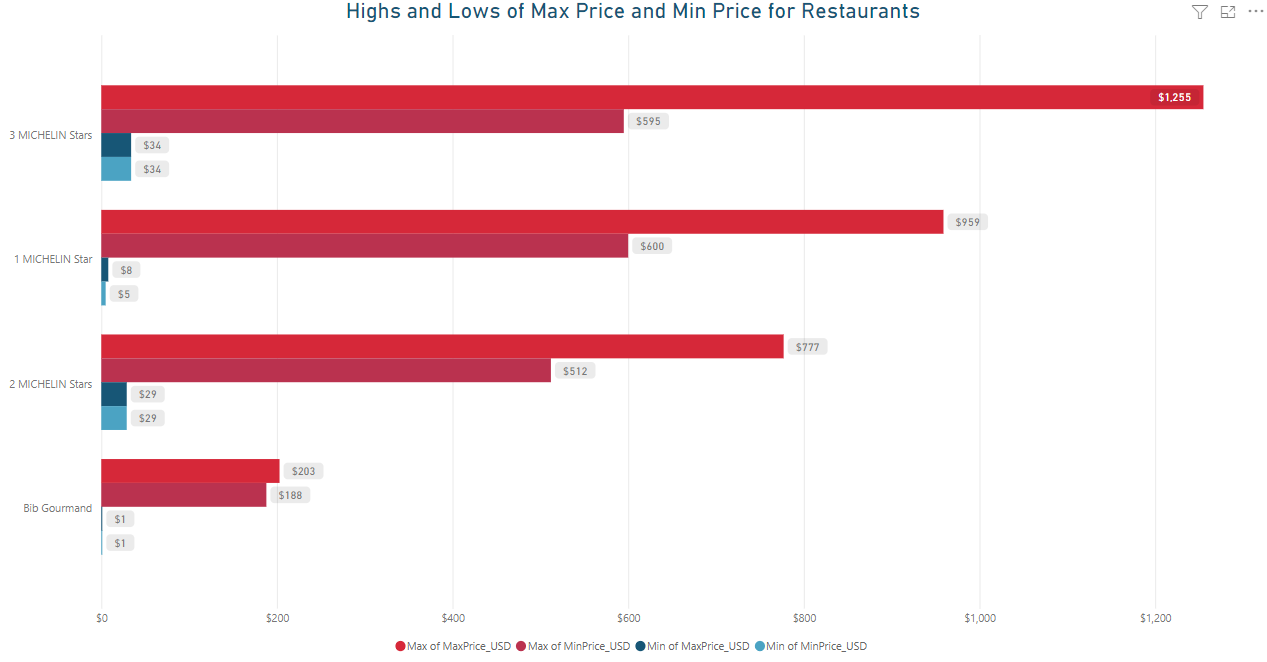  

Even more interesting results here as the most expensive, as I guessed it, was a 3 Michelin Star restaurant and the lowest being the Bib Gourmand restaurant. However, seeing that the 2 Michelin Star restaurant was the second on the list made me think about the value of the restaurants on the list. While you would typically pay more for better meals, seeing that the most expensive 2 Michelin Star restaurant being second on the list speaks volumes of its value. Furthermore, I was surprised to see that there was a 1 Michelin Star restaurant with a price tag of $959. Even if it is the third on the list, these prices are way above the average $15-25 meals. We must still consider that these might just be more than food experiences. Some restaurants have entertainment built within (such as Ultraviolet), so viewers must understand that they are not just purely paying for the food. In addition to this, some restaurants might have higher prices based on set courses rather than it being $777 for just one dish.

We'll also have a look at the most expensive items in the min prices category and the least expensive in the max prices categories.

In [2]:
/* LOOKING AT LOWEST PRICES IN THE MAX PRICE COLUMN AND THE HIGHEST PRICES IN THE MIN PRICE COLUMN */ 
SELECT Award, MAX(MinPrice_USD) AS highest_low FROM [MichelinStars].[dbo].[michelin_guide_USD] GROUP BY Award ORDER BY highest_low

SELECT Name, Award, Country, MinPrice_USD FROM [MichelinStars].[dbo].[michelin_guide_USD] 
WHERE (MinPrice_USD = 188 AND Award = 'Bib Gourmand')
    OR (MinPrice_USD = 600 AND Award = '1 MICHELIN Star')
    OR (MinPrice_USD = 512 AND Award = '2 MICHELIN Stars') 
    OR (MinPrice_USD = 595 AND Award = '3 MICHELIN Stars')
ORDER BY MaxPrice_USD

SELECT Award, MIN(MaxPrice_USD) AS lowest_high FROM [MichelinStars].[dbo].[michelin_guide_USD] GROUP BY Award ORDER BY lowest_high

SELECT Name, Award, Country, MaxPrice_USD FROM [MichelinStars].[dbo].[michelin_guide_USD] 
WHERE (MaxPrice_USD = 1 AND Award = 'Bib Gourmand')
    OR (MaxPrice_USD = 8 AND Award = '1 MICHELIN Star')
    OR (MaxPrice_USD = 29 AND Award = '2 MICHELIN Stars') 
    OR (MaxPrice_USD = 34 AND Award = '3 MICHELIN Stars')
ORDER BY MaxPrice_USD

(4 rows affected)

(4 rows affected)

(4 rows affected)

(12 rows affected)

Total execution time: 00:00:00.036

Award,highest_low
Bib Gourmand,188
2 MICHELIN Stars,512
3 MICHELIN Stars,595
1 MICHELIN Star,600


Name,Award,Country,MinPrice_USD
Ninive,Bib Gourmand,United Arab Emirates,188
Sushi Masaki Saito,2 MICHELIN Stars,Canada,512
Masa,3 MICHELIN Stars,USA,595
Angler SF,1 MICHELIN Star,USA,600


Award,lowest_high
Bib Gourmand,1
1 MICHELIN Star,8
2 MICHELIN Stars,29
3 MICHELIN Stars,34


Name,Award,Country,MaxPrice_USD
Chung Chia Sheng Jian Bao,Bib Gourmand,Taiwan,1
Unnamed Clay Oven Roll,Bib Gourmand,Taiwan,1
Fried Banana Rama 5,Bib Gourmand,Thailand,1
Lung Khajohn Wat Ket,Bib Gourmand,Thailand,1
Tue Ka Ko Na Prince,Bib Gourmand,Thailand,1
Bokkia Tha Din Daeng,Bib Gourmand,Thailand,1
Khanom Bueang Wan Phueng Noi (Chok Chai 4),Bib Gourmand,Thailand,1
A Pong Mae Sunee,Bib Gourmand,Thailand,1
Pathongko Mae Pranee,Bib Gourmand,Thailand,1
Hill Street Tai Hwa Pork Noodle,1 MICHELIN Star,Singapore,8


Though a bit confusing, this query represents the highest minimum price that exists within each of the distinctions and vice versa. Note that there are restaurants that have 1 Michelin Star with a floor of $600 while the other two Michelin Stars have price reanges that are close to that, despite having higher distinctions. On the opposite end of the spectrum, we see that there are restaurants with low highs, which is saying that there is a 3 Michelin Star restaurant whose price ceiling costs only $34 while the 2 Michelin Star restaurant has a price of $29. I wonder if the median price matches the average prices for the database. The median will give us a good idea of what teh middle values look like rather than the actual combined average...

In [28]:
/* FINDING MEDIAN FOR MINPRICE AND MAXPRICE IN THE DATABASE */ 
SELECT * FROM (
    SELECT *, ROW_NUMBER() OVER(ORDER BY MinPrice_USD) AS row_num FROM [MichelinStars].[dbo].[michelin_guide_USD]) AS subquery
    WHERE row_num = 3263

SELECT * FROM (
    SELECT *, ROW_NUMBER() OVER(ORDER BY MaxPrice_USD) AS row_num FROM [MichelinStars].[dbo].[michelin_guide_USD]) AS subquery
    WHERE row_num = 3263


(1 row affected)

(1 row affected)

Total execution time: 00:00:00.028

Name,Address,Country,Location,Currency,Cuisine,Longitude,Latitude,Award,MinPrice_USD,MaxPrice_USD,row_num
De Grote Frederik Bistro,"Frederiksplein 7, Groningen, 9724 NH, Netherlands",Netherlands,Groningen,EUR,Market Cuisine,6.581128,53.210819,Bib Gourmand,57,77,3263


Name,Address,Country,Location,Currency,Cuisine,Longitude,Latitude,Award,MinPrice_USD,MaxPrice_USD,row_num
Sülbecker Krug,"Mindener Straße 6, Nienstädt, 31688, Germany",Germany,Nienstädt,EUR,"Meats and Grills, International",9.152045,52.288926,Bib Gourmand,64,102,3263


It seems that the MinPrice median is $57 while the MaxPrice median is $102. This makes sense since the price ceiling for the MaxPrice is typically a lot higher than the MinPrice. If you take a look at the highest MaxPrice column, we see the 3 Michelin Star Ultraviolet as having a price ceiling of $1255 and in the highest of the MinPrices, we see 1 Michelin Star Angler with a price of $600. This is interesting to see as the price of the highest max is over double the price of the highest min. Same thing can be said about the median prices. What the median tells is that the middle point of the columns for MinPrice and MaxPrice, which is $57 and $102. From this we can see that the prices are typically double what you would see in the MinPrice column, where the average MaxPrice is seen as double what you would pay as a MinPrice. Let's see if that is true for all values in those columns.

In [4]:
/* SEEING IF THE AVERAGE MINPRICE IS LESS THAN THE AVERAGE MAXPRICE */ 
SELECT AVG(MinPrice_USD) AS avg_min, MIN(MinPrice_USD) AS lowest_min, MAX(MinPrice_USD) AS highest_min, AVG(MaxPrice_USD) AS avg_max, MIN(MaxPrice_USD) AS lowest_max, MAX(MaxPrice_USD) AS highest_max 
FROM [MichelinStars].[dbo].[michelin_guide_USD]

(1 row affected)

Total execution time: 00:00:00.005

avg_min,lowest_min,highest_min,avg_max,lowest_max,highest_max
80.651034,1,600,127.496704,1,1255


It's not exact, but we can definitely see that the average MaxPrice for all values is not double the average of the MinPrice column. If we also take a look at the lowest and the highest values of both columns and take the median innto account, my guess would be that the data is skewed since the highest values are so much higher than the medians. How does this look in a graph? 

  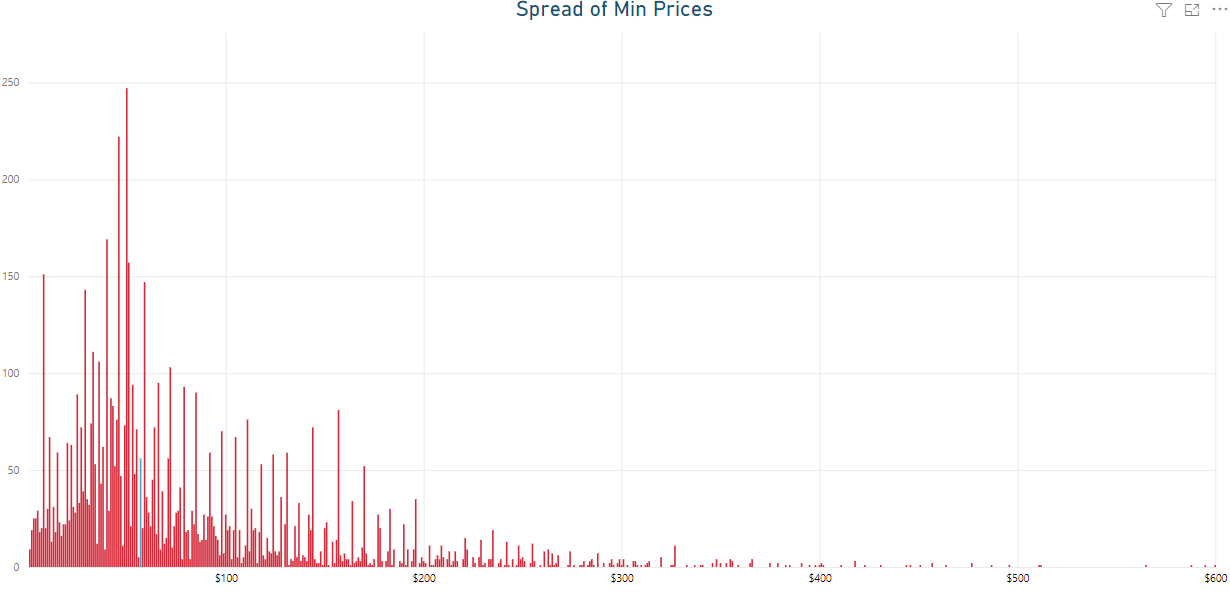 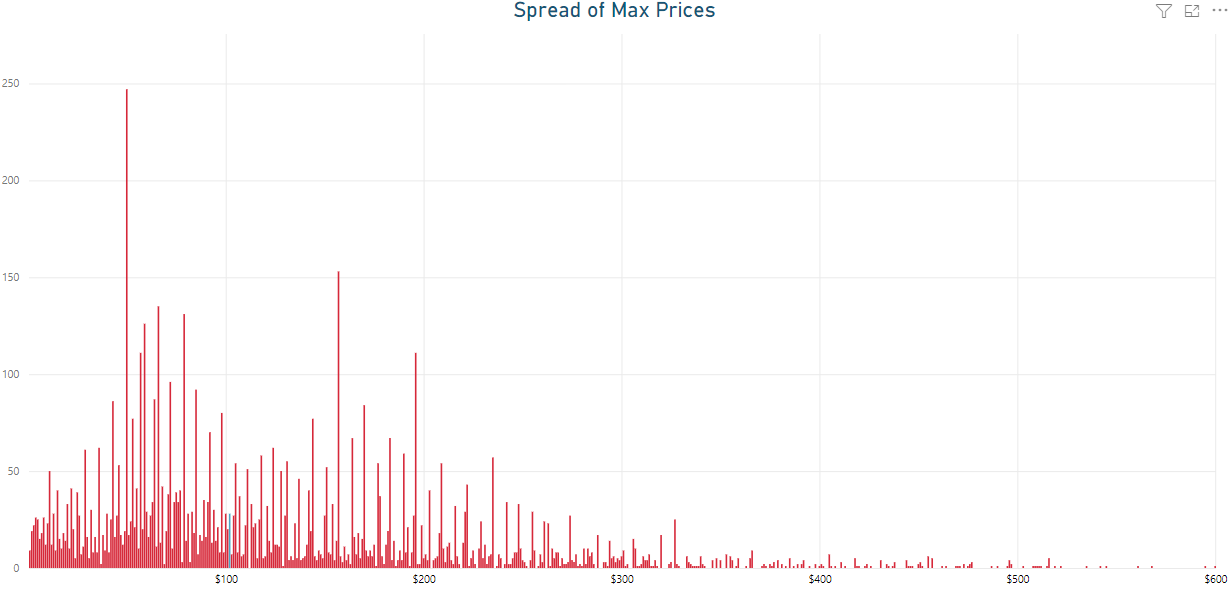 

Note: The blue label indicates the median for the two charts. It seems that the MinPrice chart is a bit tighter as it has more values that are near the median while the median in the MaxPrice chart has a wider spread with less concentration around the median. Furthermore, I had to reduce the amount of values in the dataset as for both charts, there were few outliers over $600. From these charts, we can see that the ceiling for the min prices are a lot lower than the ceiligns for the max prices, showing that prices don't really have an average that is encompassing of the data in the columns.  With all of these in mind, let's proceed with our analysis!

# Analysis

As a reminder, here are the questions we are exploring:

- Which countries have the most total distinctions?
- <span style="color: var(--vscode-foreground);">What is the pricing level like for countries around the world? If a country has more Michelin Starred restaurants, would the average meal there cost more?&nbsp;&nbsp;</span>      
- What types of cuisines are the most popular? Which get the highest distinctions?
- What are the average prices like for each type of distinction?
- Which restaurants are most "bang for your buck"?
- Does price level affect the level of distinction earned?

### **Which countries have the most total distinctions?**

A simple query will help us find this, but we can also start utilizing geographical charts and maps to better visualize which countries have the most restaurants on the Michelin Guide:

In [22]:
/* FINDING THE LIST OF TOP COUNTRIES WITH THE MOST MICHELIN DISTINCITONS AND TOTAL MICHELIN STARS */ 
SELECT TOP 20 Country, COUNT(*) AS restaurants_count FROM [MichelinStars].[dbo].[michelin_guide_USD] GROUP BY Country ORDER BY restaurants_count DESC 

(20 rows affected)

Total execution time: 00:00:00.007

Country,restaurants_count
France,1057
Japan,880
Italy,616
Germany,607
USA,537
Spain,468
United Kingdom,271
Belgium,271
Switzerland,233
Netherlands,226


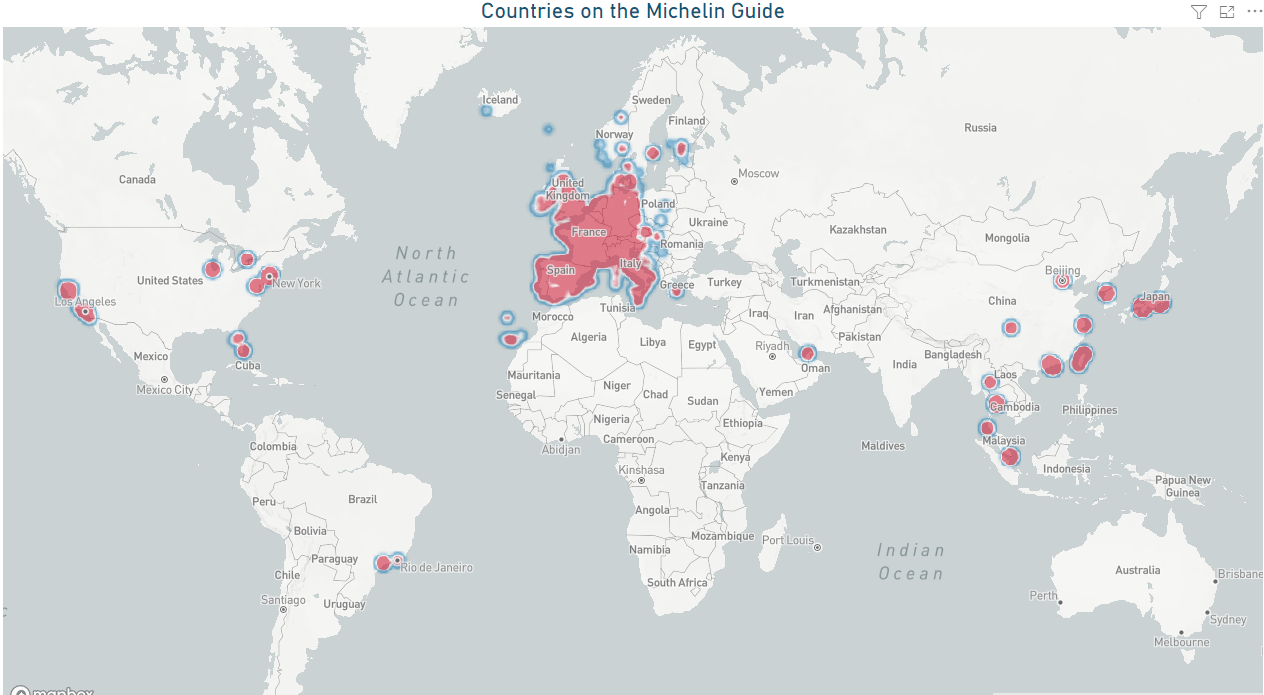

Based on the results, we see that France has the number one spot with that many restaurants belonging to the Michelin Guide. In general, Eurpoe definitely has the most restaurants on the Michelin Guide with Asia right behind (with a lot of its resturants from Japan). However, this doesn't really help us too much as we don't know how many of those restaurants are actually Michelin starred since these are way harder to get than normal Bib Gourmand awards.

In [27]:
/* CLASSIFYING AWARDS INTO NUMERICS */ 
SELECT *, CASE 
	WHEN Award LIKE '1%' THEN 1
	WHEN Award LIKE '2%' THEN 2
	WHEN Award LIKE '3%' THEN 3
	ELSE 0
END AS star_count
INTO [MichelinStars].[dbo].[michelin_guide_stars]
FROM [MichelinStars].[dbo].[michelin_guide_USD]

(6525 rows affected)

Total execution time: 00:00:00.027

In [11]:
SELECT TOP 50 * FROM [MichelinStars].[dbo].[michelin_guide_stars]

(50 rows affected)

Total execution time: 00:00:00.008

Name,Address,Country,Location,Currency,Cuisine,Longitude,Latitude,Award,MinPrice_USD,MaxPrice_USD,star_count
Jua,"36 E. 22nd St., New York, 10010, USA",USA,New York,USD,"Korean, Korean Contemporary",-73.987447,40.740014,1 MICHELIN Star,135,135,1
Meadowsweet,"149 Broadway, New York, 11212, USA",USA,New York,USD,"Mediterranean Cuisine, American Contemporary",-73.963170,40.710354,1 MICHELIN Star,75,75,1
The River Café,"1 Water St., New York, 11201, USA",USA,New York,USD,Contemporary,-73.994298,40.703427,1 MICHELIN Star,54,175,1
Marea,"240 Central Park South, New York, 10019, USA",USA,New York,USD,"Seafood, Italian",-73.981068,40.767619,1 MICHELIN Star,63,150,1
odo,"17 W. 20th St., New York, 10011, USA",USA,New York,USD,"Japanese, Sushi",-73.992990,40.740704,1 MICHELIN Star,125,235,1
Le Coucou,"138 Lafayette St., New York, 10013, USA",USA,New York,USD,"French, Classic French",-74.000010,40.719162,1 MICHELIN Star,150,185,1
Kanoyama,"175 Second Ave., New York, 10003, USA",USA,New York,USD,"Japanese, Sushi",-73.986466,40.730657,1 MICHELIN Star,75,75,1
Cote,"16 W. 22nd St., New York, 10010, USA",USA,New York,USD,"Korean, Steakhouse",-73.991462,40.741423,1 MICHELIN Star,150,150,1
Ai Fiori,"400 Fifth Ave., New York, 10018, USA",USA,New York,USD,"Italian, French",-73.983570,40.750130,1 MICHELIN Star,110,175,1
Rezdôra,"27 E. 20th St., New York, 10003, USA",USA,New York,USD,"Italian, Emilian",-73.989008,40.739004,1 MICHELIN Star,65,100,1


In [9]:
/* GROUPING COUNTRIES BY AWARD COUNT AND NUMBER OF RESTAURANTS FROM EACH AWARD DISTINCTION */ 
SELECT TOP 50 *, sub.total_star % sub.restaurant_count AS mod_check FROM
    (SELECT Country, Award, SUM(star_count) AS total_star, COUNT(Award) AS restaurant_count
    FROM [MichelinStars].[dbo].[michelin_guide_stars] WHERE Award NOT LIKE 'Bib%' GROUP BY Country, Award) AS sub ORDER BY Award DESC, total_star DESC

(50 rows affected)

Total execution time: 00:00:00.035

Country,Award,total_star,restaurant_count,mod_check
France,3 MICHELIN Stars,93,31,0
Japan,3 MICHELIN Stars,63,21,0
USA,3 MICHELIN Stars,39,13,0
Italy,3 MICHELIN Stars,33,11,0
Spain,3 MICHELIN Stars,33,11,0
Germany,3 MICHELIN Stars,27,9,0
United Kingdom,3 MICHELIN Stars,24,8,0
China,3 MICHELIN Stars,21,7,0
Hong Kong,3 MICHELIN Stars,21,7,0
Belgium,3 MICHELIN Stars,9,3,0


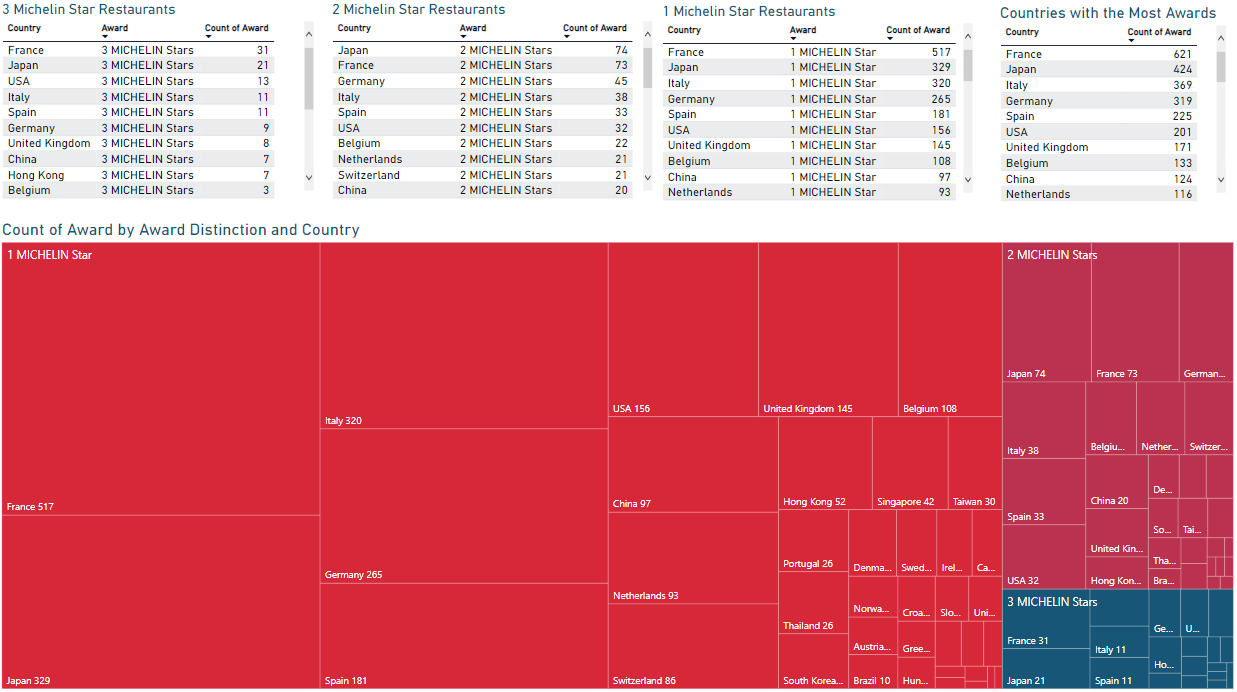 

This query was supplemental to see which countries has the most Michelin stars, and evidently, France is a reigning champ for all three distinctions. Coming in second, we can definitely say that it is Japan, then Italy coming in third. However, we must note that the difference between each star is huge. The food isn't just better but actually much better, and since this is objective, we can't justify that 3 Star Michelin food is 3x better than those of 2 Michelin Stars. Though it is clear that France has the most Michelin stars across 1, 2, and 3 Michelin Stars. So, even though those countires at the top has the most Michelin stars, is it representative of that region's cuisine? For example, if France has the most stars, are almost all of those stars earned French food?

### **What types of cuisines are the most popular? Which get the highest distinctions?**

This can be a continuation from the last question as we want to see what types of cuisine gets the highest distinctions and see if it matches what that country's cuisine is. As a reminder, here are the most popular cuisines:

In [8]:
/* FINDING THE MOST POPULAR CUISINES */
SELECT TOP 20 Cuisine, COUNT(Cuisine) AS cuisine_count FROM [michelin_guide_stars] WHERE Award NOT LIKE 'Bib%' GROUP BY Cuisine ORDER BY cuisine_count DESC

(20 rows affected)

Total execution time: 00:00:00.013

Cuisine,cuisine_count
Modern Cuisine,662
Creative,421
Japanese,239
French,99
"Creative, Modern Cuisine",80
Cantonese,68
"Modern Cuisine, Creative",66
Sushi,64
Classic Cuisine,61
Contemporary,58


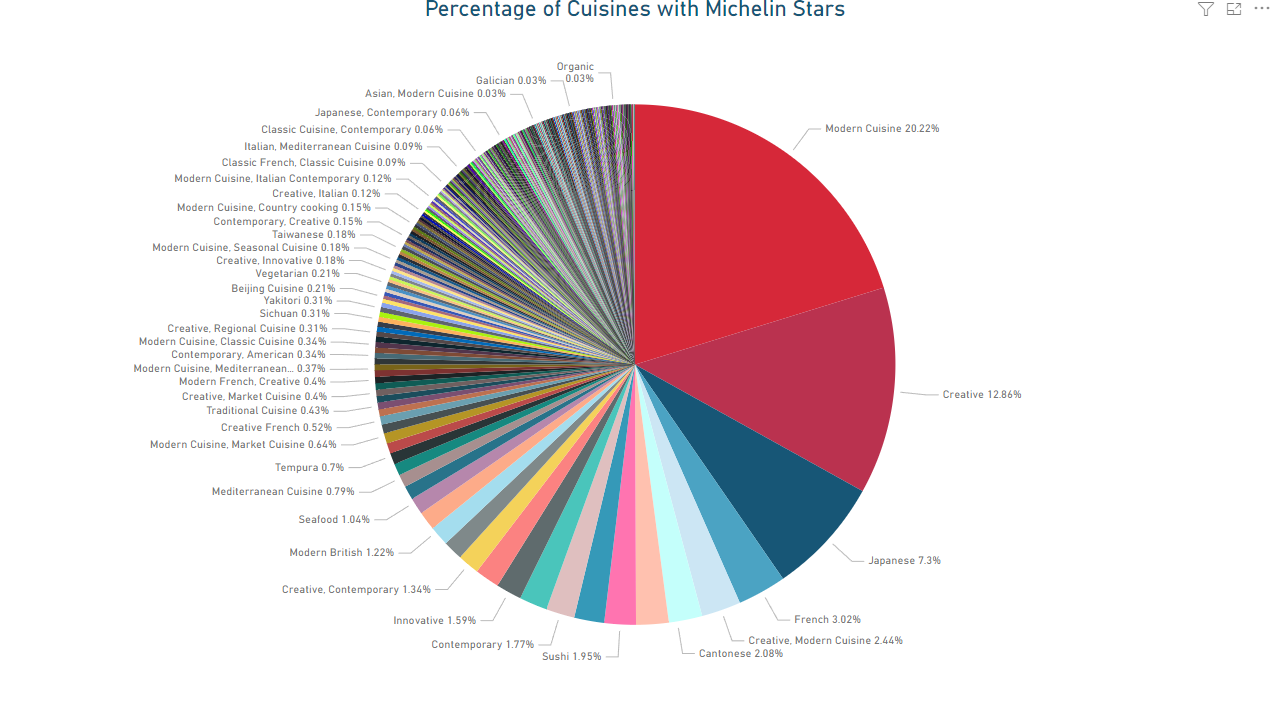

With the previous charts in mind, this is surprising as France has the most distinctions, but there are only 99 restaurants that has Michelin stars. A big chunk of the cuisines actually falls under [Modern Cuisine](https://ice.edu/blog/defense-modern-cuisine), which after some research, is defined as "In short, it's a buzzword—the latest term used to describe an innovative and avant garde style of cooking." One thing that is notable is that modern cuisine stems from a French chef, but there are many branches under Modern Cuisine. The big technique behind Modern Cuisine is the use of mollecular gastronomy, where there is a scientific discipline that studies the chemistry of food and representing food in new and modern ways. As a result, modern cuisine can fall into the category of many umbrellas, which could be French, American, Italian, etc. Since the database does not specify what type of cuisine the Modern Cuisine stems from, we would have to proceed with what we have and find out as much as we can. Furthermore, there are many other categories in the cuisine column that has ambiguous meanings, such as Creative, Contemporary, Innovative, International, or even Traditional food. The amount of combined cuisines and distinct cuisines that we can't tell what type of food that cuisine consists us leaves us empty handed in the sense of finding a correlation. At this moment, it is hard to narrow down a correlation between country and cuisine to see what typically formulates a 3 Michelin Star restaurant, so we might have to build our focus on what type of cuisine typically contributes to more Michelin stars. 

One interesting thing I found was that French food only makes 3% of the dataset while France has the most Michelin stars. Japanese food, on the other hand, ranks second in terms of the most Michelin stars and has the third highest percentage in the chart.

In [11]:
/* TOP COUNTRIES CUISINES AND HOW MANY RESTAURANTS HAVE THAT CUISINE */ 
SELECT TOP 30 Country, Cuisine, COUNT(Cuisine) AS Restaurant_Count, SUM(Star_Count) AS total_stars
FROM [MichelinStars].[dbo].[michelin_guide_stars] WHERE Award NOT LIKE 'Bib%' GROUP BY Country, Cuisine ORDER BY Restaurant_Count DESC

(30 rows affected)

Total execution time: 00:00:00.023

Country,Cuisine,Restaurant_Count,total_stars
France,Modern Cuisine,318,350
Japan,Japanese,197,262
France,Creative,138,198
Italy,Modern Cuisine,75,80
Spain,Creative,70,108
Japan,French,70,91
Spain,Modern Cuisine,69,76
Italy,Creative,66,77
United Kingdom,Modern Cuisine,51,55
Japan,Sushi,43,55


It seems that France has the most restaurants with Modern Cuisine as well as the most Michelin Stars for that cuisine, which is interesting as French food in France that has a Michelin star _does not exist_ in this dataset. Funnily enough, Japan has the highest amount of French restaurants that have Michelin stars. I wonder what other countries have are not known for their food in terms of belonging on the Michelin Guide...

In [3]:
/* LOOKING AT COUNTRIES WITH MICHELIN STARS WITH FOOD FROM ITS COUNTRY */ 
SELECT Country, SUM(star_count) AS m_stars, COUNT(Award) AS restaurant_count FROM [michelin_guide_stars] 
WHERE (Award LIKE '%MICHELIN%' AND Country = 'French' AND Cuisine = 'French')
OR (Award LIKE '%MICHELIN%' AND Country = 'Japan' AND Cuisine IN ('Japanese', 'Sushi'))
OR (Award LIKE '%MICHELIN%' AND Country = 'USA' AND Cuisine LIKE 'American') 
OR (Award LIKE '%MICHELIN%' AND Country = 'Italy' AND Cuisine LIKE 'Italian') 
OR (Award LIKE '%MICHELIN%' AND Country = 'Spain' AND Cuisine LIKE 'Spanish')
OR (Award LIKE '%MICHELIN%' AND Country = 'United Kingdom' AND Cuisine LIKE 'British') GROUP BY Country

(2 rows affected)

Total execution time: 00:00:00.051

Country,m_stars,restaurant_count
Japan,317,240
USA,3,3


In [13]:
/* SEEING HOW MANY MICHELIN STARRED RESTAURANTS OFFER JAPANESE FOOD INSIDE OF JAPAN */ 
SELECT COUNT(Name) AS japan_restaurants FROM [michelin_guide_stars] WHERE Star_Count IN (1, 2, 3) AND Country = 'Japan' AND Cuisine IN ('Japanese', 'Sushi')

/* SEEING HOW MANY MICHELIN STARRED RESTAURANTS OFFER JAPANESE FOOD OUTSIDE OF JAPAN */ 
SELECT COUNT(Name) AS japan_restaurants FROM [michelin_guide_stars] WHERE Star_Count IN (1, 2, 3) AND Country != 'Japan' AND Cuisine IN ('Japanese', 'Sushi')

/* TOTAL MICHELIN STARRED RESTAURANTS THAT OFFER JAPANESE FOOD */ 
SELECT COUNT(Name) AS japan_restaurants FROM [michelin_guide_stars] WHERE Star_Count IN (1, 2, 3) AND Cuisine IN ('Japanese', 'Sushi')

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.014

japan_restaurants
240


japan_restaurants
63


japan_restaurants
303


Correlated with the pie chart above, we see that out of the top few Countries on the previous query, Japan is the only country within the top 5 that has restaurants belonging to Japanese cuisine (this strictly does not count resturants that are sub-categories of Japanese cuisine, such as Yakitori or Tempura). Out of the 424 restaurants in Japan that has Michelin stars, 317 of them specialize in Japanese food. Based on this we can't simply say that Michelin restaurants in Japan are representative of Japanese cooking in general (as a lot of French restaurants are in Japan) and that Japanese food is top of the list. However, it is interesting to see that it has the most representation of its food in the Michelin Guide. One limitation is that there are too many cuisines on this list for us to specify that it falls under a specific type of cuisine, thus, this limits our findings to a more broad idea of which countries have the most stars and which cuisines in those countries have the highest amount of Michelin stars. Let's see the spread of cuisines and how many stars it gets for each distinction.

In [44]:
/* FINDING TYPE OF CUISINES WITH 3 MICHELIN STARS AND NUMBER OF RESTAURANTS AROUND THE WORLD */ 
SELECT TOP 10 *, sub.total_stars / 3 AS num_restaurants FROM (
SELECT Cuisine, SUM(star_count) AS total_stars, COUNT (DISTINCT Country) AS num_countries
FROM [michelin_guide_stars] WHERE Award = '3 MICHELIN Stars' GROUP BY Cuisine) AS sub ORDER BY total_stars DESC

/* FINDING TYPE OF CUISINES WITH 2 MICHELIN STARS AND NUMBER OF RESTAURANTS AROUND THE WORLD */ 
SELECT TOP 10 *, sub.total_stars / 2 AS num_restaurants FROM (
SELECT Cuisine, SUM(star_count) AS total_stars, COUNT (DISTINCT Country) AS num_countries
FROM [michelin_guide_stars] WHERE Award = '2 MICHELIN Stars' GROUP BY Cuisine) AS sub ORDER BY total_stars DESC

/* FINDING TYPE OF CUISINES WITH 1 MICHELIN STAR AND NUMBER OF RESTAURANTS AROUND THE WORLD */ 
SELECT TOP 10 *, sub.total_stars AS num_restaurants FROM (
SELECT Cuisine, SUM(star_count) AS total_stars, COUNT (DISTINCT Country) AS num_countries
FROM [michelin_guide_stars] WHERE Award = '1 MICHELIN Star' GROUP BY Cuisine) AS sub ORDER BY total_stars DESC

(10 rows affected)

(10 rows affected)

(10 rows affected)

Total execution time: 00:00:00.029

Cuisine,total_stars,num_countries,num_restaurants
Creative,93,7,31
Japanese,42,1,14
Modern Cuisine,33,6,11
French,21,3,7
Cantonese,18,3,6
Classic French,15,3,5
"Creative, Modern Cuisine",15,3,5
French Contemporary,12,3,4
Classic Cuisine,9,1,3
"Contemporary, Californian",9,1,3


Cuisine,total_stars,num_countries,num_restaurants
Creative,220,15,110
Modern Cuisine,92,14,46
Japanese,80,4,40
"Creative, Modern Cuisine",44,7,22
French,40,4,20
Innovative,34,6,17
Contemporary,28,5,14
Sushi,24,3,12
Cantonese,22,2,11
Classic Cuisine,20,3,10


Cuisine,total_stars,num_countries,num_restaurants
Modern Cuisine,605,24,605
Creative,280,22,280
Japanese,185,18,185
French,72,12,72
"Modern Cuisine, Creative",58,8,58
"Creative, Modern Cuisine",53,10,53
Cantonese,51,4,51
Modern French,51,5,51
Sushi,50,7,50
Classic Cuisine,48,12,48


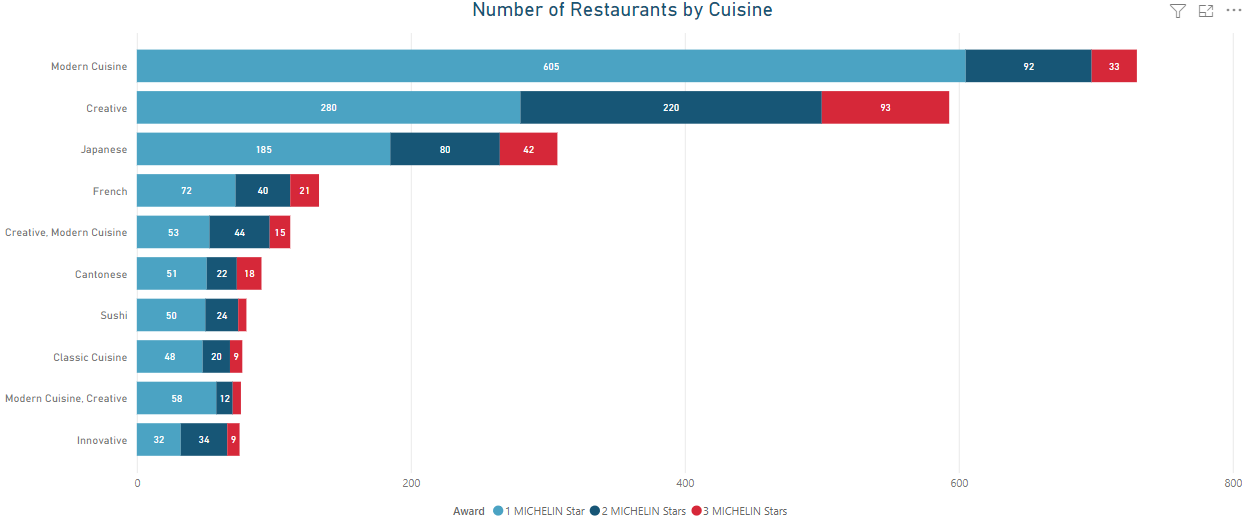
It seems that the top 3 cuisines are Modern Cuisine, Creative and Japanese. While Modern Cuisine and Creative food can be found in almost all of the countries, Japanese food can be seen as an example of where a country's culture and cuisine is at the very top of its country. Of the 303 restaurants around the world serving Japanese or Sushi, Japan has 240 of those restaurants in its country, which is evidently the highest percentage of Michelin stars by a country based on its national cuisine compared to any other country. This is an interesting find as Japan fiecely battles with France in getting the top spot in being the country with the most Michelin stars, but in terms of winning the battle based on its national dish, Japan clearly has the win here. Based on this, does this mean that Japanese food is the best, especially the restaurants stemming from Japan? While it does add to our recipe of narrowing down our criteria in what it means to make a good restaurant, we must not lose sight of the Modern Cuisine and Creative cuisines. Since the amount of restaurants in that realm far beats the amount of stars earned from Japanese cuisine, it is easy to say that those two cuisines is what contributes to higher Michelin stars. Furthermore, even if Japan has a high count of Japanese restaurant Michelin stars, it doesn't mean that Japan can also be a fierce competitor in the Modern and Creative cuisine scene. 
It's hard to narrow it down as Modern Cuisine has 20% of the Michelin stars while Creative has 12% of all Michelin stars. In addition to this, even though Modern Cuisine has the highest percentage of restaurants with that particular cuisine, it loses to Creative in having less restaurants in the 2 and 3 Michelin star distinction category. Based on this, we see that even though Modern Cuisine has a lot of restaurants in the 1 Michelin Star category, Creative beats both Modern Cuisine and Japanese as it takes the top spot for number of restaurants in the 2 and 3 Michelin star categories. Looks can be deceiving, especially in charts like the one shown above where Modern Cuisine seems to take a far and definitive lead. But upon closer look at the Creative cuisine restaurants, we see that there are way more 2 and 3 Michelin star restaurants that feature that cuisine. 
I want to take a pivot here and see if I can prove my point that Creative cuisine is the best in this database. For the sake of this test, I will assume that with each new star, the quality of food doubles. For example, a 2 Michelin star restaurant's food is 2x better than the taste of that in the 1 Michelin star restaurant. I want to utilize weighted averages to get the correct weights for the distinctions to get a better understanding of how the taste compares based on different cuisines.

In [9]:
/* EXPERIMENT: FINDING AVERAGE TASTE FOR EACH CUISINE BASED ON NUMBER OF MICHELIN STARS FOR THE MODERN CUISINE */ 

SELECT SUM(Star_Count) AS total_stars, COUNT(star_count) AS num_restaurants
FROM [michelin_guide_stars] WHERE Cuisine = 'Modern Cuisine' AND Star_Count != 0 GROUP BY Star_Count ORDER BY total_stars DESC

SELECT SUM(qry2.weighted_taste) AS sum_taste, SUM(qry2.num_restaurants) AS total_res, SUM(CAST(qry2.weighted_taste AS INT))/SUM(CAST(qry2.num_restaurants AS INT)) AS avg_taste FROM (
SELECT *, CASE 
    WHEN total_stars%2 = 0 THEN qry1.total_stars*2 
    WHEN total_stars%3 = 0 THEN qry1.total_stars*3
    ELSE qry1.total_stars
    END AS weighted_taste
FROM 
    (SELECT SUM(Star_Count) AS total_stars, COUNT(star_count) AS num_restaurants
    FROM [michelin_guide_stars] WHERE Cuisine = 'Modern Cuisine' AND Star_Count != 0 GROUP BY Star_Count) AS qry1) AS qry2

SELECT 1.491 AS MC_avg_taste

/* Upon perfoming this calculation, I realized there is an error with rounding. Having sum_taste and dividing it by total_res is clearly not equivalent to 1. I also tried to run this calculation through SQL 
but that didn't work for me either as simply using 'SELECT 987/662' still returned a value of 1. I also tried to cast it and change the data types but that didn't work out for me. I will proceed to do the same process for each of the top 3 cuisines and manually input
the calculations performed on a calculator at the end of the query for the sake of this experiment. 

I also realized that this did not make sense. The number of stars for the restaurant continues to increase in this calculation, so I decided to simply find the average total_stars per num_restaurants instead to see the average
stars a restaurant gets under a specific cuisine. However, I wanted to include this as a learning lesson, revised queries below. */

SELECT SUM(sq.total_stars)/SUM(sq.num_restaurants) AS mc_avg_star FROM
    (SELECT SUM(Star_Count) AS total_stars, COUNT(star_count) AS num_restaurants
    FROM [michelin_guide_stars] WHERE Cuisine = 'Modern Cuisine' AND Star_Count != 0 GROUP BY Star_Count) AS sq

SELECT 1.102 AS mc_avg_star

(3 rows affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.017

total_stars,num_restaurants
605,605
92,46
33,11


sum_taste,total_res,avg_taste
888,662,1


MC_avg_taste
1.491


mc_avg_star
1


mc_avg_star
1.102


In [16]:
/* EXPERIMENT: FINDING AVERAGE TASTE FOR EACH CUISINE BASED ON NUMBER OF MICHELIN STARS FOR THE CREATIVE CUISINE */ 
SELECT SUM(Star_Count) AS total_stars, COUNT(star_count) AS num_restaurants
FROM [michelin_guide_stars] WHERE Cuisine = 'Creative' AND Star_Count != 0 GROUP BY Star_Count ORDER BY total_stars DESC

SELECT SUM(sq.total_stars)/SUM(sq.num_restaurants) AS c_avg_star FROM
    (SELECT SUM(Star_Count) AS total_stars, COUNT(star_count) AS num_restaurants
    FROM [michelin_guide_stars] WHERE Cuisine = 'Creative' AND Star_Count != 0 GROUP BY Star_Count) AS sq

SELECT 1.409 AS c_avg_star

(3 rows affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.013

total_stars,num_restaurants
280,280
220,110
93,31


c_avg_star
1


c_avg_star
1.409


In [17]:
/* EXPERIMENT: FINDING AVERAGE TASTE FOR EACH CUISINE BASED ON NUMBER OF MICHELIN STARS FOR JAPANESE CUISINE */ 
SELECT SUM(Star_Count) AS total_stars, COUNT(star_count) AS num_restaurants
FROM [michelin_guide_stars] WHERE Cuisine = 'Japanese' AND Star_Count != 0 GROUP BY Star_Count ORDER BY total_stars DESC

SELECT SUM(sq.total_stars)/SUM(sq.num_restaurants) AS j_avg_star FROM
    (SELECT SUM(Star_Count) AS total_stars, COUNT(star_count) AS num_restaurants
    FROM [michelin_guide_stars] WHERE Cuisine = 'Japanese' AND Star_Count != 0 GROUP BY Star_Count) AS sq

SELECT 1.285 AS j_avg_star

(3 rows affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.011

total_stars,num_restaurants
185,185
80,40
42,14


j_avg_star
1


j_avg_star
1.285


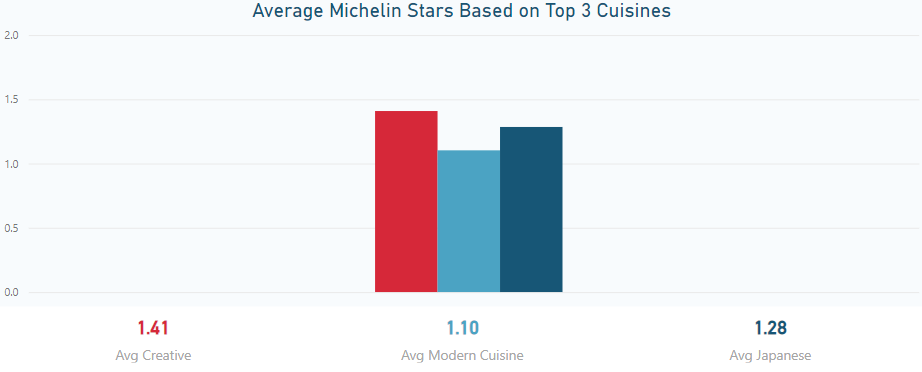

This is an interesting find as even though Modern Cuisine has the most restaurants with Michelin stars, the average star per restaurant for Creative and Japanese cuisine beat the average star per restaurant for Modern Cuisine. This is impressive as it helps point us in the right direction and proves our initial thoughts. Going forward, I plan on correcting some of the mistakes made in the initial calculations so that I can better calculate the averages. In conclusion, this helps guide us as we know that Creative restaurants are more likely to have Michelin stars. 

### **What are the average prices like for each type of distinction?**

We performed some of these calculations in the beginning, so now is a great time fo rus to revisit and see if it applies to what we know so far. Because we have a MinPrice and a MaxPrice column, this makes our analysis a bit more complex as restaurants with a wide range of prices might be harder to find averages for. Let's start with some introductory queries to help us proceed.

In [14]:
/* FINDING AVERAGE PRICES FOR EACH RESTAURANT */ 
SELECT TOP 50 *, CAST((MinPrice_USD + MaxPrice_USD)/2 AS FLOAT) AS AvgPrice FROM [MichelinStars].[dbo].[michelin_guide_stars]

/* Because we might be using this column often, let's create a new table from these results. */ 
SELECT *, CAST((MinPrice_USD + MaxPrice_USD)/2 AS FLOAT) AS AvgPrice INTO [MichelinStars].[dbo].[michelin_guide_price] FROM [MichelinStars].[dbo].[michelin_guide_stars]

(50 rows affected)

Total execution time: 00:00:00.022

Name,Address,Country,Location,Currency,Cuisine,Longitude,Latitude,Award,MinPrice_USD,MaxPrice_USD,star_count,AvgPrice
Jua,"36 E. 22nd St., New York, 10010, USA",USA,New York,USD,"Korean, Korean Contemporary",-73.987447,40.740014,1 MICHELIN Star,135,135,1,135
Meadowsweet,"149 Broadway, New York, 11212, USA",USA,New York,USD,"Mediterranean Cuisine, American Contemporary",-73.963170,40.710354,1 MICHELIN Star,75,75,1,75
The River Café,"1 Water St., New York, 11201, USA",USA,New York,USD,Contemporary,-73.994298,40.703427,1 MICHELIN Star,54,175,1,114.5
Marea,"240 Central Park South, New York, 10019, USA",USA,New York,USD,"Seafood, Italian",-73.981068,40.767619,1 MICHELIN Star,63,150,1,106.5
odo,"17 W. 20th St., New York, 10011, USA",USA,New York,USD,"Japanese, Sushi",-73.992990,40.740704,1 MICHELIN Star,125,235,1,180
Le Coucou,"138 Lafayette St., New York, 10013, USA",USA,New York,USD,"French, Classic French",-74.000010,40.719162,1 MICHELIN Star,150,185,1,167.5
Kanoyama,"175 Second Ave., New York, 10003, USA",USA,New York,USD,"Japanese, Sushi",-73.986466,40.730657,1 MICHELIN Star,75,75,1,75
Cote,"16 W. 22nd St., New York, 10010, USA",USA,New York,USD,"Korean, Steakhouse",-73.991462,40.741423,1 MICHELIN Star,150,150,1,150
Ai Fiori,"400 Fifth Ave., New York, 10018, USA",USA,New York,USD,"Italian, French",-73.983570,40.750130,1 MICHELIN Star,110,175,1,142.5
Rezdôra,"27 E. 20th St., New York, 10003, USA",USA,New York,USD,"Italian, Emilian",-73.989008,40.739004,1 MICHELIN Star,65,100,1,82.5


: Msg 2714, Level 16, State 6, Line 5
There is already an object named 'michelin_guide_price' in the database.

Note: The error above is shown due to to save memory on this file

Now that we have a new table to work with, we can start making easier calculations involving the new average column we created. Here's a first look at some numbers involving the new average column.

In [8]:
/* FINDING AVERAGE PRICES FOR DISTINCTIONS */ 
SELECT Award, ROUND(AVG(AvgPrice), 2) AS award_avg, AVG(MinPrice_USD) AS award_min_avg, AVG(MaxPrice_USD) AS award_max_avg FROM [michelin_guide_price] GROUP BY Award ORDER BY award_avg

(4 rows affected)

Total execution time: 00:00:00.014

Award,award_avg,award_min_avg,award_max_avg
Bib Gourmand,48.49,37.970163,59.015379
1 MICHELIN Star,139.81,106.551879,173.064661
2 MICHELIN Stars,220.89,173.549266,268.224318
3 MICHELIN Stars,322.47,267.124087,377.824817


Well, that more or less answered our question. It seems that (obviously) the 3 Michelin Star restaurants had the highest averages for both mins and maxes, resulting in the highest average too. Conversely, Bib Gourmand has the lowest averages, but it is interesting to see as that is what a typical Bib Gourmand restaurant looks like. One thing to keep in mind here is how current and relevant the data is for the prices. Since the data is not recent, it might not reflect current day prices for the restaurants, prices can be off due to inflation, and prices are not clear as to what is included in the restaurant. As I mentioned before, even though some restaurants are more expensive or cheaper than others, the prices in this dataset does not explain what items those prices are for. For example, meals at 3 Michelin Star restaurants could be for "prix fixe" meals while the prices for the Bib Gourmand distinction could be for singular items or a meal set for 2. Since the prices aren't clear of what to expect, it is difficult to say that 2 Michelin Star restaurants are always more expensive than 1 Michelin Star restaurants. To help supplement these findings, let's see how many restaurants of lower distinctions actually have higher average prices than higher distinctions.

In [9]:
/* SEEING HOW MANY BIB GOURMAND RESTAURANTS HAVE HIGHER AVG SCORES THAN THE 1 MICHELIN STAR AVG */ 
SELECT COUNT(Name) AS restaurants_over1 FROM [michelin_guide_price] WHERE Award LIKE 'BIB%' AND AvgPrice > 139.81

/* SEEING HOW MANY 1 MICHELIN STAR RESTAURANTS HAVE HIGHER AVG SCORES THAN THE 2 MICHELIN STAR AVG */ 
SELECT COUNT(Name) AS restaurants_over2 FROM [michelin_guide_price] WHERE Award LIKE '1%' AND AvgPrice > 220.89

/* SEEING HOW MANY 2 MICHELIN STAR RESTAURANTS HAVE HIGHER AVG SCORES THAN THE 3 MICHELIN STAR AVG */ 
SELECT COUNT(Name) AS restaurants_over3 FROM [michelin_guide_price] WHERE Award LIKE '2%' AND AvgPrice > 322.47

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.011

restaurants_over1
1


restaurants_over2
178


restaurants_over3
37


What this means is that the classifications between 1 Michelin Stars and 2 Michelin Stars can overlap a bit in terms of pricing while there are a few restaurants with a 2 Michelin Star distinction that has the price range average of the 3 Michelin Star restaurants. From these simple calculations, we can see that the average prices for each distinction is as follows: 
- Bib Gourmand: $48
- 1 Michelin Star: $139
- 2 Michelin Stars: $220
- 3 Michelin Stars: $322
Thus, when we see restaurants, we can estimate it to belong to one of the following categories. But this is not a sure fire way of discerning whether any restaurant will belong to these distinctions as taste in this case is king. Thus, we must take into account that this is just an estimation of what restaurants within these categories are priced at, rather than use it as a predictive tool when looking at new restaurants without distinctions. 
  
  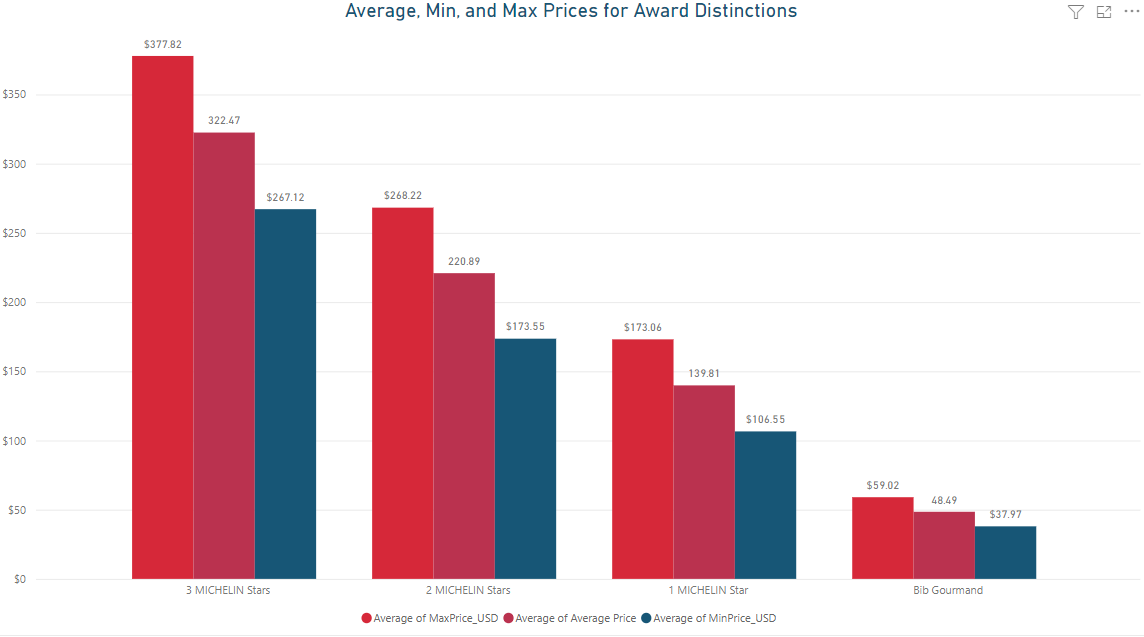
### **Which type of restaurants are the most "bang for your buck"?**
This question is a bit unconventional and the reason being that there isn't a clear way to measure this. From an initial stand point, I thought of restaurants as being "bang for your buck" as restaurants being on the cheaper side in higher distinctions. Since we have some of the prices above, this will help us think about what restaurants offer the most value in terms of what you're eating vs. what prices you are paying. Furthermore, this measure does not include quantity in the analysis, so it is hard to say that even if you are dining at a high end restaurant and getting a lot of food doesn't necessarily that it has great value. It could also mean the ability to try a variety of food and ingredients in one establishment or even having a lot of food for the amount of diners in the group (as splitting payments can make the cost per person cheaper). With this in mind, let's take a look at all the restaurants that are priced well for the distinctions they are in and see how that compares to the price ranges of the distinction below. As you might have guessed, the chart above does offers a great explanation of which restaurant prices we would want to look at.

In [4]:
/* FINDING A LIST OF ALL RESTAURANTS THAT ARE LOWER AND HIGHER THAN THE AVERAGE PRICE OF THE BIB GOURMAND CATEGORY */ 
SELECT COUNT(AvgPrice) AS bib_low FROM [MichelinStars].[dbo].[michelin_guide_price] WHERE AvgPrice < (SELECT ROUND(AVG(AvgPrice),2) FROM [MichelinStars].[dbo].[michelin_guide_price] WHERE Award LIKE 'Bib%') 

SELECT COUNT(AvgPrice) AS total_bib FROM [MichelinStars].[dbo].[michelin_guide_price] WHERE Award LIKE 'Bib%'


(1 row affected)

(1 row affected)

Total execution time: 00:00:00.015

bib_low
1504


total_bib
3251


Out of the 3251 restaurants that are Bib Gourmand status, we have 1504 of them being under the average price for that award. This means that around 46.3% of the restaurants are under the average, meaning they are the ones with good value for that distinction.
From a first look, this means that the value under the bib\_low column represents the amount of restaurants with prices cheaper than the Bib Gourmand average. While it might be accurate to classify a restaurant that only costs $1-2 less than the average as something of high value compared to restaurants with prices $10 less than the average, for the sake of this experiement, we will say that those prices that are under the average will count as being of good value despite the price difference. Let's proceed with the rest of the distinctions.

In [27]:
/* FINDING A LIST OF ALL RESTAURANTS THAT ARE LOWER AND HIGHER THAN THE AVERAGE PRICE OF THE 1 MICHELIN STAR CATEGORY */ 
SELECT COUNT(AvgPrice) AS one_low FROM [michelin_guide_price] WHERE Award LIKE '1%' AND AvgPrice < (SELECT ROUND(AVG(AvgPrice),2) FROM [michelin_guide_price] WHERE Award LIKE '1%')

/* FINDING A LIST OF ALL RESTAURANTS THAT ARE LOWER AND HIGHER THAN THE AVERAGE PRICE OF THE 2 MICHELIN STAR CATEGORY */ 
SELECT COUNT(AvgPrice) AS two_low FROM [michelin_guide_price] WHERE Award LIKE '2%' AND AvgPrice < (SELECT ROUND(AVG(AvgPrice),2) FROM [michelin_guide_price] WHERE Award LIKE '2%') 

/* FINDING A LIST OF ALL RESTAURANTS THAT ARE LOWER AND HIGHER THAN THE AVERAGE PRICE OF THE 3 MICHELIN STAR CATEGORY */ 
SELECT COUNT(AvgPrice) AS three_low FROM [michelin_guide_price] WHERE Award LIKE '3%' AND AvgPrice < (SELECT ROUND(AVG(AvgPrice),2) FROM [michelin_guide_price] WHERE Award LIKE '3%') 

SELECT COUNT(AvgPrice) AS total_1 FROM [michelin_guide_price] WHERE Award LIKE '1%'
SELECT COUNT(AvgPrice) AS total_2 FROM [michelin_guide_price] WHERE Award LIKE '2%'
SELECT COUNT(AvgPrice) AS total_3 FROM [michelin_guide_price] WHERE Award LIKE '3%'

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.047

one_low
1466


two_low
250


three_low
71


total_1
2660


total_2
477


total_3
137


From here, I can see a few of the percentages of restaurants being under their award price averages. 
- 1 Michelin Star: 1466/2660 = 55.11% of values below average
- 2 Michelin Stars: 250/477 = 52.41% of values below average
- 3 Michelin Stars: 71/137 = 51.82% of values below average
- Bib Gourmand: 1504/3251 = 46.26% below average
<span style="color: var(--vscode-foreground);">So what does this mean? It means that Bib Gourmand restaurants typically have more varied prices as there are more restaurants (54% of all restaurants) in the Bib Gourmand category having average prices greater than the general average, which makes it somewhat more rare to find cheaper food relative to the other distinctions. However, when you look at the 1 Michelin Star category, around 55% of all restaurants with 1 Michelin Star are below the average price, which means that there are some restaurants in the award distinction that really pulls up the average prices even when it might be easier to find food that is lower than the average for that category. Based on these conclusions, we can see that it might be easier to find a restaurant within the 1 Michelin Star category that has a average prices lower than the average price of all 1 Michelin Star restaurants while it might be almost 10% harder to find restaurants belonging in the Bib Gourmand category with prices lower than the Bib Gourmand average. &nbsp;Let's take a closer look at the Bib Gourmand category and see what the prices look like.</span>
  
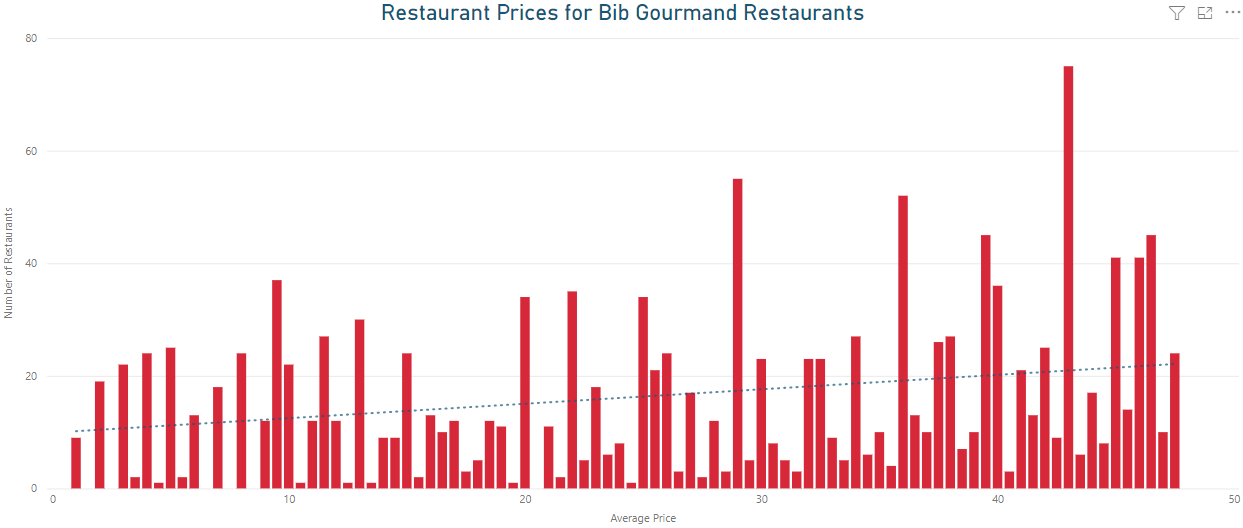 Clearly, some of the restaurants on the far left hand side represent the most value as they are the cheapest in terms of prices for the Bib Gourmand category. Based on the trend line, we can see that there are more restaurants in this category as the prices go up. As a comparison for the trend lines, here's what all of the charts look like for all award categories:  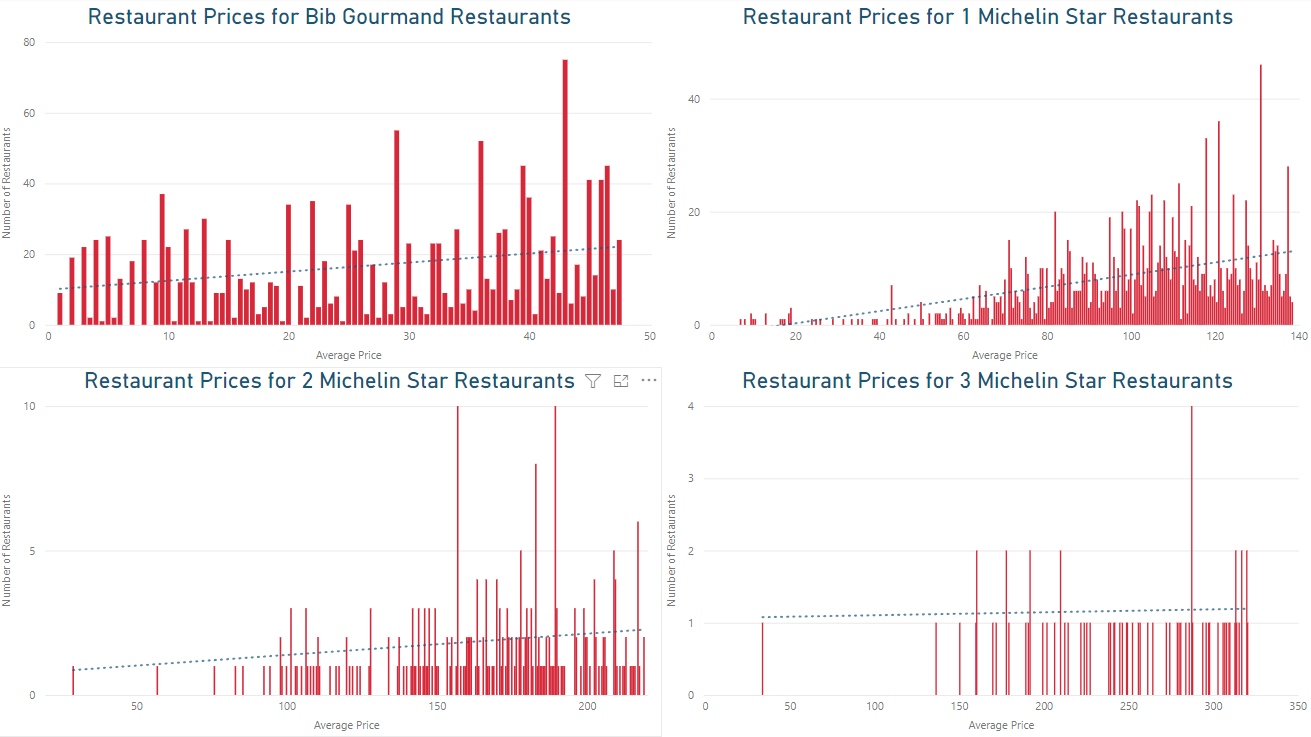 
  
Though a bit hard to see, all award categories show that under the average, the number of restaurants increase as the prices increase. Looking at the trendlines we can summarize the following: 
- Restaurants in the Bib Gourmand category have the most even spread, which means you can find just as many restaurants on the cheaper end vs on the higher end in terms of price
- Restaurants in the 1 Michelin Star category has the highest quantity of restaurants that are below the average
- 2 and 3 Michelin Star restaurants are harder to find, and have a tighter spread as mroe restaurants are skewed towards the average As such, based on these findings, we can see that 1 Michelin Star restaurants have the most value as you can find more restaurants that have a Michelin star under its industry average, all the while getting higher quality of cooking compared to the Bib Gourmand category.  Let's pivot a bit and take a look at the 1 Michelin Star restaurants. Since they have the highest amount of restaurants under its own average price, we can narrow down our search to seeing what type of cuisine within the distinction fits the most  value for what people pay for.

In [35]:
/* QUICK QUERY TO REMIND US OF THE AVERAGE FOR 1 MICHELIN STAR RESTAURANTS */
SELECT ROUND(AVG(AvgPrice), 0) AS total_avg FROM [MichelinStars].[dbo].[michelin_guide_price] WHERE Award LIKE '1%'

/* GETTING TOP 10 LIST OF CUISINES AROUND THE WORLD THAT HAVE 1 MICHELIN STAR */
SELECT * FROM(
    SELECT TOP 50 Cuisine, COUNT(Cuisine) AS cuisine_count, CEILING(AVG(AvgPrice)) AS avg_price_cuisine 
    FROM [MichelinStars].[dbo].[michelin_guide_price] WHERE Award LIKE '1%' GROUP BY Cuisine ORDER BY cuisine_count DESC) AS a
WHERE a.avg_price_cuisine < 140

(1 row affected)

(22 rows affected)

Total execution time: 00:00:00.020

total_avg
140


Cuisine,cuisine_count,avg_price_cuisine
Modern Cuisine,605,131
French,72,132
Cantonese,51,131
Modern French,51,134
Contemporary,43,127
Italian,43,134
Modern British,37,92
Seafood,29,132
Tempura,18,132
Classic French,17,123


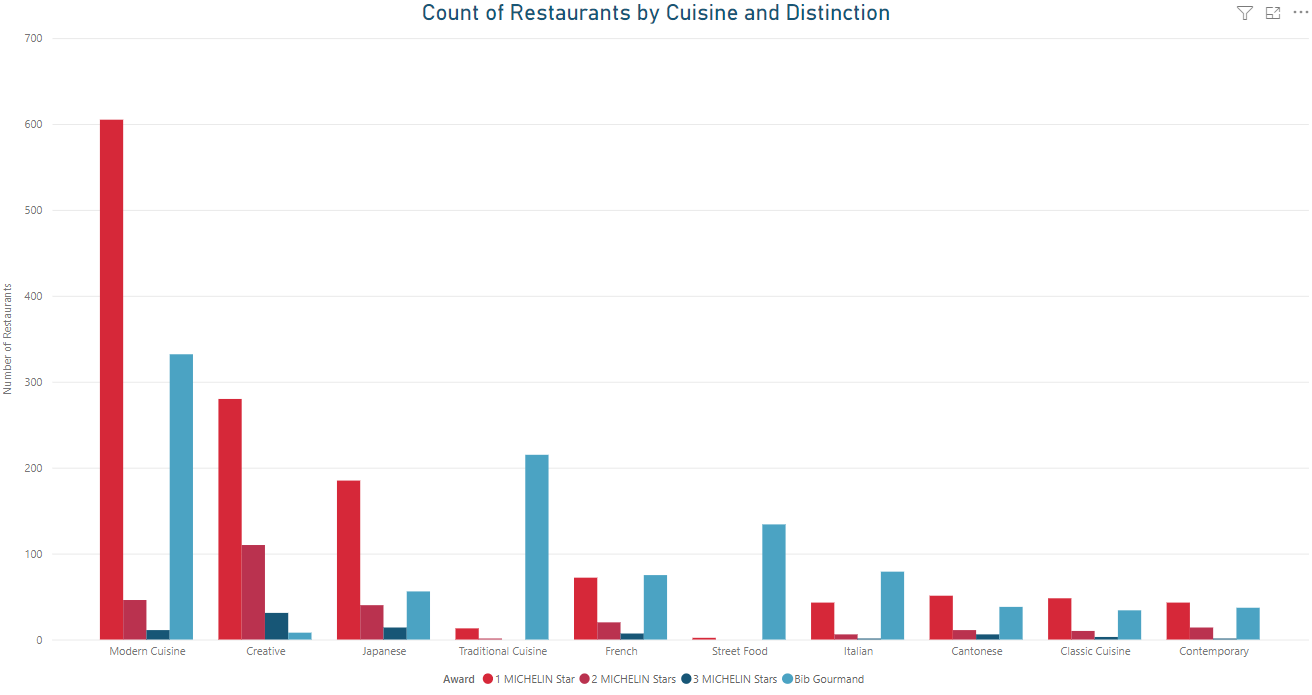  

These are the top 1 Michelin Star cuisines around the world ranked based on the count of restaurants. There's a clear winner here and that is the Modern Cuisine, which signifies that around the world, it is easier to find a 1 Michelin star Modern Cuisine restaurant with prices below the distinction's average. Thus, if one of these restaurants were in the area, it would be worth visiting as it is plentiful, features higher quality of cooking, and has a higher chance of being cheaper than the distinction average. 

However, taste and value is a bit difficult to classify with cuisines. Some cuisines that are broad like Modern Cuisine or Contemporary might feature French dishes or Asian influence, so it's difficult to say that it will be worth and/or have high value. Taste is subjective and people assign value to different things differently. If you look at the query results again, you could see that on the cheaper end features Yakitori, which is Japanese cuisine. People that love Yakitori restaurants might think that going to a restaurant as such with prices way lower than the average will be the most worth it since price is a big factor here. Because everyone assigns value and taste differently, it's hard to say that going to a Modern Cuisine restaurant will meet their expectations and every restaurant is different. I do say that, in this case, going to a restaurant as such could be considered high value as it is easily accessible, is still cheaper than the average for the 1 Michelin Star category, and could feature palettes that fits more people's taste, as it wouldn't have so many restaurants with 1 Michelin Star if the food wasn't particularly good. In future experiments, this should be explored in more detail.

### **Does price level affect the level of distinction earned?**

In this section, we will take a look at how price might affect distinction earned to see if there is any correlation. It is also possible that the inverse can be true--as the higher the distinction, the higher the prices. We will still rely on average prices for each restaurant as that provides a clearer idea of what diners might spend on average at their meals.

In [3]:
/* AVERAGE PRICES OF EACH DISTINCTION */
SELECT Award, CEILING(AVG(AvgPrice)) AS award_avg FROM [MichelinStars].[dbo].[michelin_guide_price] GROUP BY Award ORDER BY award_avg

/* FINDING RANGE OF AVG PRICES ACROSS DISTINCTIONS */ 
SELECT *, (a.avg_max - a.avg_min) AS avg_range FROM
    (SELECT Award, CEILING(AVG(MaxPrice_USD)) AS avg_max, CEILING(AVG(MinPrice_USD)) AS avg_min, CEILING(AVG(AvgPrice)) AS avg_price
    FROM [MichelinStars].[dbo].[michelin_guide_price] GROUP BY Award) AS a
    ORDER BY avg_min

(4 rows affected)

(4 rows affected)

Total execution time: 00:00:00.025

Award,award_avg
Bib Gourmand,49
1 MICHELIN Star,140
2 MICHELIN Stars,221
3 MICHELIN Stars,323


Award,avg_max,avg_min,avg_price,avg_range
Bib Gourmand,60,38,49,22
1 MICHELIN Star,174,107,140,67
2 MICHELIN Stars,269,174,221,95
3 MICHELIN Stars,378,268,323,110


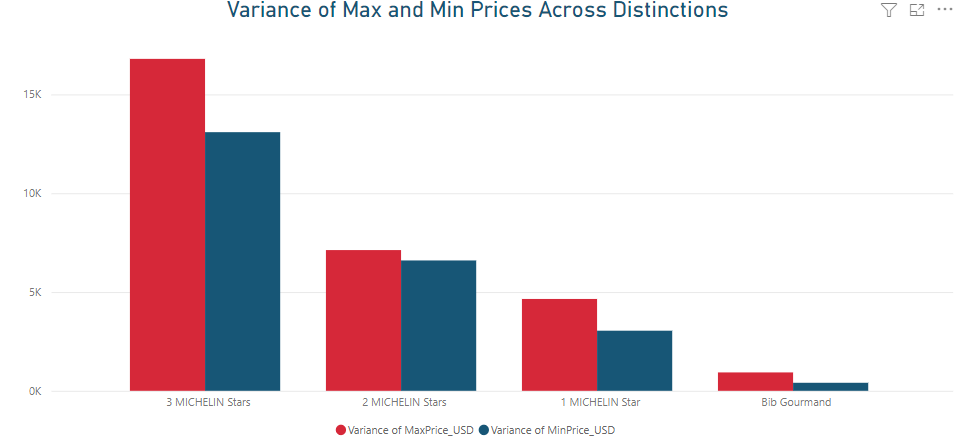

As discussed previously, the spread for 3 Michelin Star is larger than the rest, which shows that the variance is greater than the other categories. It actually has the highest variance amongst the awards, highlighting the fact that it has the most amount of spread vs. ones with lower spreads such as the Bib Gourmand award. Paired up with the averages for each of the award price tags:

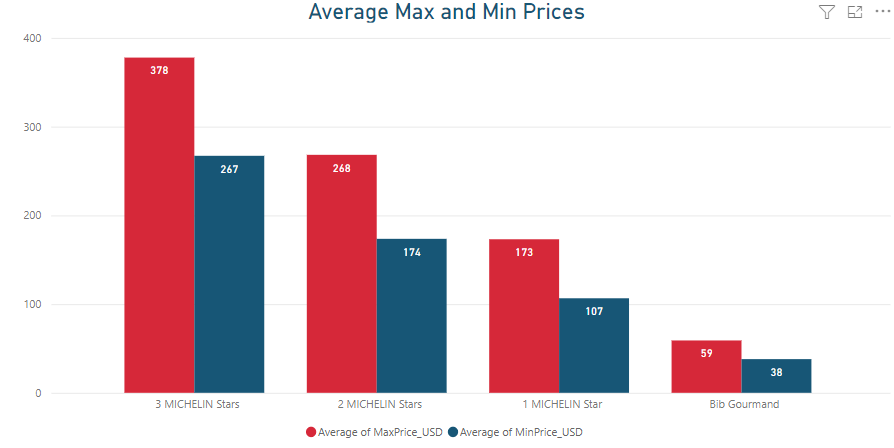

Very similar patterns going on here. Like I mentioned before, the fact that the averages of the mins align with the next award's maxes is interesting to see, almost as if it is showing that they are "categorized" even with pricing in a sense. Taking a look at the variance is important here as it shows how much the data varies from the mean, as the greater the variance, the greater the variation that we see the dataset stray from the average of the award prices. 

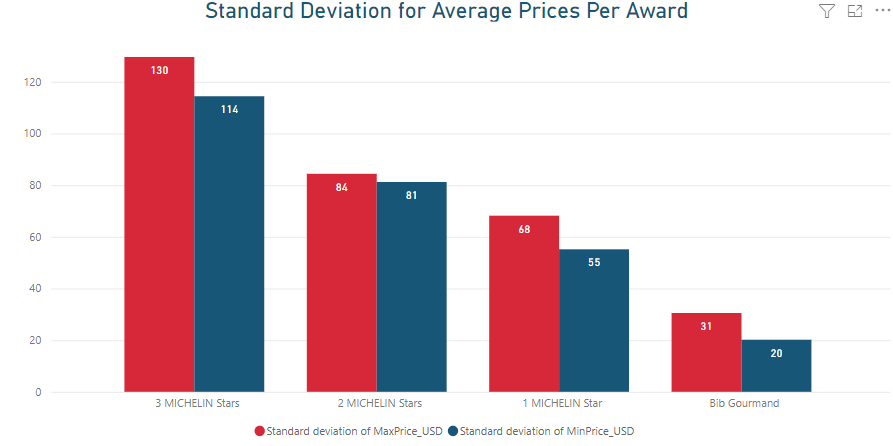

Tying in the standard deviation shows us how spread the actual data is. Looking at the range simply does not tell us how far the prices are spread from each other, but seeing it here shows that some awards actually have price ranges that is actually more closer knit together. 3 Michelin Star restaurants still have the most deviation from the mean which implies that predicting the prices might be a bit more difficult, but we can strongly guess where it would lie by looking at the average prices chart. The trend continues down the rest of the awards, so it's safe to say that restaurants it's predictable to see what a restaurant's price range would be given the distinction. Though it will be more difficult to pinpoint maxes and mins for each award due to many outliers and that menus differ, we can see that the trend is linear; the higher the distinction, the higher the price. 

Of course, conversion rates apply and prices may be different across different countries. Sometimes restaurants in the US might be higher priced due to inflation and status of the economy vs restaurants in Japan where the dollar is stronger. Taking this into account can lead to more variables, which could impact the price of dishes as some dishes might be priced higher in context of the country vs. other countries. That's not to say that the food will not be on par, but conversion rate is tricky and it can lead to asking more questions around the value of dishes around the world. 

We started this question asking about price levels and if we can predict the awards that are earned. Based on the average  prices above, we can create four different price levels and see if our models so far to see just how many restaurants actually fall within the average ranges. We will set up: 

- Bib Gourmand: $38 - $60
- 1 Michelin Star: $107 -$174
- 2 Michelin Stars: $174 - $269
- 3 Michelin Stars: $268 - $378

These will be the ranges to see how closely the % of resaurants fall in this range and see if there really is a prominent price level.

In [30]:
/* FINDING THE COUNT OF RESTAURANTS THAT FALL WITHIN THE RANGES FOR EACH AWARD */ 
SELECT *, ROUND((CAST((b.range_count) AS FLOAT) / CAST((b.total_count) AS FLOAT))* 100, 2) AS percentage_in FROM 
    (SELECT a.Award, SUM(CASE WHEN a.qualify LIKE 'Y%' THEN 1 ELSE 0 END) AS range_count, COUNT(CASE WHEN a.qualify IS NULL OR a.qualify LIKE 'Y%' THEN 1 ELSE 0 END) AS total_count FROM
        (SELECT *, CASE 
            WHEN Award LIKE 'Bib%' AND AvgPrice >= 38 AND AvgPrice <=  60 THEN 'Yes'
            WHEN Award LIKE '1%' AND AvgPrice >= 107 AND AvgPrice <=  174 THEN 'Yes'
            WHEN Award LIKE '2%' AND AvgPrice >= 174 AND AvgPrice <=  269 THEN 'Yes'
            WHEN Award LIKE '3%' AND AvgPrice >= 268 AND AvgPrice <=  378 THEN 'Yes'
            ELSE NULL
            END AS qualify
        FROM [MichelinStars].[dbo].[michelin_guide_price]) AS a
    GROUP BY Award) AS b
    ORDER BY Award

(4 rows affected)

Total execution time: 00:00:00.015

Award,range_count,total_count,percentage_in
1 MICHELIN Star,1350,2660,50.75
2 MICHELIN Stars,243,477,50.94
3 MICHELIN Stars,67,137,48.91
Bib Gourmand,1327,3251,40.82


What's interesting here is that the percentages don't really seem like majorities. Rather, it lingers around the 40% - 50% range and doesn't really seem to go past it. While this does not indicate the majority, it does indicate that around half of the restaurants belong in the mentioned price ranges. So how can we find ranges that match 75% of the restaurants in the range without prices that interfere with the other price ranges? It's harder to do since many restaurants have such a wide range. Let's try this again but this time, we are going to use the following as the ranges to see if this helps. Since prices can start at $0 and the highest the range average is about $380, we will try to split it up evenly for each category. 

- Bib Gourmand: $0 - $95
- 1 Michelin Star: $96 - $190
- 2 Michelin Stars: $191 - $285
- 3 Michelin Stars: $286 - $380

In [31]:
/* FINDING THE COUNT OF RESTAURANTS THAT FALL WITHIN THE SIMPLIFIED AND REVISED RANGES FOR EACH AWARD */ 
SELECT *, ROUND((CAST((b.range_count) AS FLOAT) / CAST((b.total_count) AS FLOAT))* 100, 2) AS percentage_in FROM 
    (SELECT a.Award, SUM(CASE WHEN a.qualify LIKE 'Y%' THEN 1 ELSE 0 END) AS range_count, COUNT(CASE WHEN a.qualify IS NULL OR a.qualify LIKE 'Y%' THEN 1 ELSE 0 END) AS total_count FROM
        (SELECT *, CASE 
            WHEN Award LIKE 'Bib%' AND AvgPrice >= 0 AND AvgPrice <=  95 THEN 'Yes'
            WHEN Award LIKE '1%' AND AvgPrice > 96 AND AvgPrice <=  190 THEN 'Yes'
            WHEN Award LIKE '2%' AND AvgPrice > 191 AND AvgPrice <=  285 THEN 'Yes'
            WHEN Award LIKE '3%' AND AvgPrice > 286 AND AvgPrice <=  380 THEN 'Yes'
            ELSE NULL
            END AS qualify
        FROM [MichelinStars].[dbo].[michelin_guide_price]) AS a
    GROUP BY Award) AS b
    ORDER BY Award

(4 rows affected)

Total execution time: 00:00:00.018

Award,range_count,total_count,percentage_in
1 MICHELIN Star,1793,2660,67.41
2 MICHELIN Stars,212,477,44.44
3 MICHELIN Stars,60,137,43.8
Bib Gourmand,3169,3251,97.48


This is very interesting as well as the percentages are very different here. On one hand we included almost every Bib Gourmand restaurant but got even less of the 2 and 3 Michelin Star restaurants. Why is this? It must be that by removing the lower prices from the higher awards, we actually found less matches for the categories. I want to play around with the maxes and try something different. Instead of doing $380, let's try $400 and give each category $100 differences to see how this stacks up and see if we are on the right track. In this next example, we are raising the average mins and the average maxes to see if we can encompass more values.

In [32]:
/* FINDING THE COUNT OF RESTAURANTS THAT FALL WITHIN $100 INCREMENTS TO $400 */ 
SELECT *, ROUND((CAST((b.range_count) AS FLOAT) / CAST((b.total_count) AS FLOAT))* 100, 2) AS percentage_in FROM 
    (SELECT a.Award, SUM(CASE WHEN a.qualify LIKE 'Y%' THEN 1 ELSE 0 END) AS range_count, COUNT(CASE WHEN a.qualify IS NULL OR a.qualify LIKE 'Y%' THEN 1 ELSE 0 END) AS total_count FROM
        (SELECT *, CASE 
            WHEN Award LIKE 'Bib%' AND AvgPrice >= 0 AND AvgPrice <=  100 THEN 'Yes'
            WHEN Award LIKE '1%' AND AvgPrice > 101 AND AvgPrice <=  200 THEN 'Yes'
            WHEN Award LIKE '2%' AND AvgPrice > 201 AND AvgPrice <=  300 THEN 'Yes'
            WHEN Award LIKE '3%' AND AvgPrice > 301 AND AvgPrice <=  400 THEN 'Yes'
            ELSE NULL
            END AS qualify
        FROM [MichelinStars].[dbo].[michelin_guide_price]) AS a
    GROUP BY Award) AS b
    ORDER BY Award

(4 rows affected)

Total execution time: 00:00:00.019

Award,range_count,total_count,percentage_in
1 MICHELIN Star,1776,2660,66.77
2 MICHELIN Stars,218,477,45.7
3 MICHELIN Stars,58,137,42.34
Bib Gourmand,3197,3251,98.34


The results didn't really change that much from the $380 model, so it seems that we are continuing to try to expand our range but at the same time, removing some restaurants out of this range at the same time. with one last test, let's try to find the weights and divide the prices according to each category weight. As a reminder:

In [12]:
/* AWARD WEIGHTS FOR ALL RESTAURANTS IN LIST */ 
SELECT Award, COUNT(Award) AS number_restaurants FROM [MichelinStars].[dbo].[michelin_guide_price] GROUP BY Award ORDER BY Award

/* TOTAL NUMBER OF ALL RESTAURANTS TO ASSIST WITH WEIGHT */ 
SELECT COUNT(*) AS total_count FROM [MichelinStars].[dbo].[michelin_guide_price]


(4 rows affected)

(1 row affected)

Total execution time: 00:00:00.013

Award,number_restaurants
1 MICHELIN Star,2660
2 MICHELIN Stars,477
3 MICHELIN Stars,137
Bib Gourmand,3251


total_count
6525


In [22]:
/* WEIGHT OF RESTAURANTS TO AID IN RANGE */ 
SELECT Award, ROUND((CAST(COUNT(Award) AS FLOAT)/6525)*100.00, 2) AS percent_restaurants FROM [MichelinStars].[dbo].[michelin_guide_price] GROUP BY Award ORDER BY Award


(4 rows affected)

Total execution time: 00:00:00.012

Award,percent_restaurants
1 MICHELIN Star,40.77
2 MICHELIN Stars,7.31
3 MICHELIN Stars,2.1
Bib Gourmand,49.82


Now if we want to continue using the range of $0 - $400, we would have to get the weights for each award, multiply it by the weight to ensure we are capturing the correct range and then establish a range. For example, since Bib Gourmand has 52.22% of the restaurants in the sample, our range would go from $0 to $400 \* .5222. which is:

In [23]:
SELECT 400 * .4982 AS bib_range

(1 row affected)

Total execution time: 00:00:00.004

bib_range
199.2800


Great! We figured out our first range, which is $0 - $199.28 for Bib Gourmand, which is a bit of a large range. As a guess, we should be covering almost all values in the Bib Gourmand category but we must continue forward.

As we continue calculating, I found that the next range would be: 

1 Michelin Star: $400 \* .4077 = 163.08 + 199.29 = $362.37 (Range is $199.29 - $362.37)

2 Michelin Stars: $400 \* .0731 = 29.24 + 362.38 = $391.52 (Range is $362.37 - $391.52)

3 Michelin Stars: <span style="color: var(--vscode-foreground);">$400 * .021 = 8.4 + 391.53 = $400&nbsp; (Range is $391.53 - $400)</span>

Now let's set this up and see how this looks:

In [24]:
/* FINDING THE COUNT OF RESTAURANTS BASED ON COUNT OF WEIGHT OF ALL RESTAURANTS IN SAMPLE */ 
SELECT *, ROUND((CAST((b.range_count) AS FLOAT) / CAST((b.total_count) AS FLOAT))* 100, 2) AS percentage_in FROM 
    (SELECT a.Award, SUM(CASE WHEN a.qualify LIKE 'Y%' THEN 1 ELSE 0 END) AS range_count, COUNT(CASE WHEN a.qualify IS NULL OR a.qualify LIKE 'Y%' THEN 1 ELSE 0 END) AS total_count FROM
        (SELECT *, CASE 
            WHEN Award LIKE 'Bib%' AND AvgPrice >= 0 AND AvgPrice <=  199.28 THEN 'Yes'
            WHEN Award LIKE '1%' AND AvgPrice > 199.28 AND AvgPrice <=  362.37 THEN 'Yes'
            WHEN Award LIKE '2%' AND AvgPrice > 362.37 AND AvgPrice <=  391.52 THEN 'Yes'
            WHEN Award LIKE '3%' AND AvgPrice > 391.52 AND AvgPrice <=  400 THEN 'Yes'
            ELSE NULL
            END AS qualify
        FROM [MichelinStars].[dbo].[michelin_guide_price]) AS a
    GROUP BY Award) AS b
    ORDER BY Award

(4 rows affected)

Total execution time: 00:00:00.015

Award,range_count,total_count,percentage_in
1 MICHELIN Star,289,2660,10.86
2 MICHELIN Stars,10,477,2.1
3 MICHELIN Stars,3,137,2.19
Bib Gourmand,3251,3251,100


On the bright side, we encompassed all restaurants within the Bib Gourmand category but everything else is a miss. It's difficult to see what the pricing actually would look like since the values can vary and it can intertwine and share ranges. There would be no surefire way to see if a restaurant would fall under a specific award based on its price and vice versa since there are too many variables. However we can only guess based on averages. Furthermore, if presented with restaurants that are not on the Michelin Guide, it's really difficult to discern.

# **Closing Remarks**

I learned quite a lot of things from this EDA about the Michelin Guide as a food enthusiast. It's always been a dream of mine to try as many of these restaurants as I can and it's so great to look at it analytically to find trends and patterns. I didn't have a big question in mind, but from the few that I explored, I learned a number of things:

### **Which countries have the most total distinctions?**

When taking a look at the highest amount of stars based on country, I compiled the following:

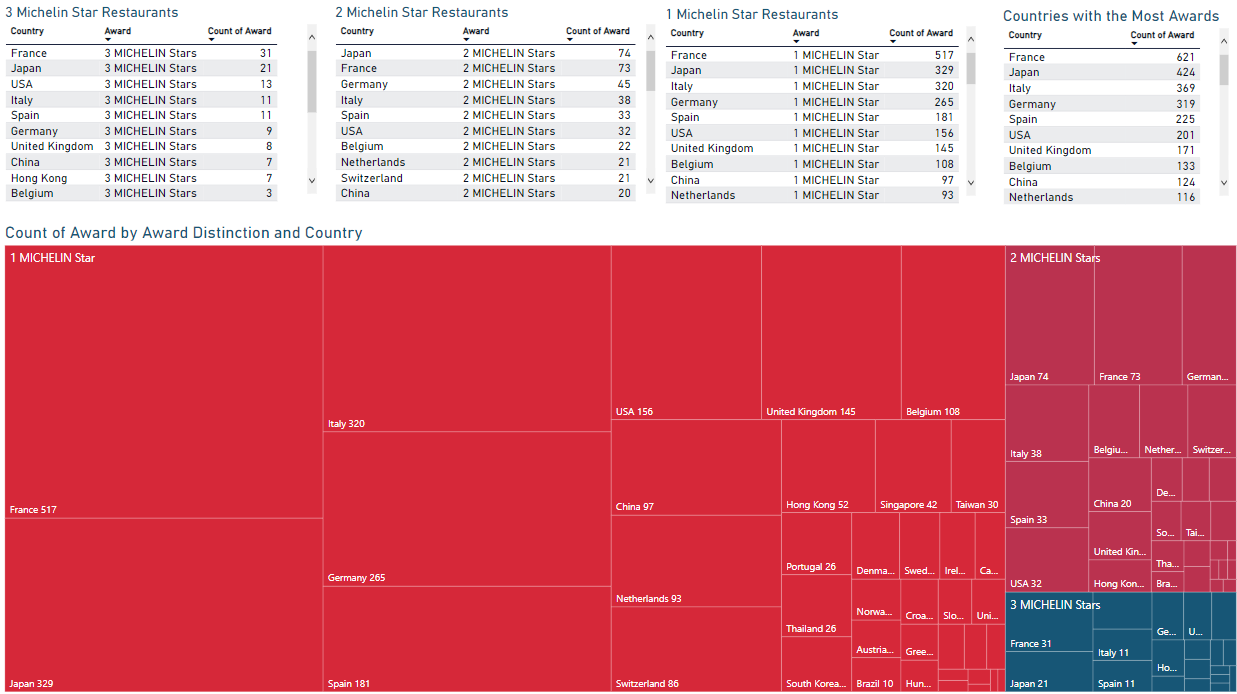

In the beginning, it was evident that France was the clear leader with Japan only beating France in the 2 Michelin Star award by one restaurant. It seemed that if we only looked at Michelin Stars, these were the countries on top. These were the countries that had the most prestige in terms of having high quality restaurants. 

However, I realize that I left out a big chunk. I looked at the Michelin Stars only and failed to include the Bib Gourmand distinctions. Even though its prestige is still not up there, it is still worth mentioning.

In [29]:
SELECT TOP 10 Country, COUNT(*) AS michelin_count FROM [MichelinStars].[dbo].[michelin_guide_price] WHERE Award LIKE 'B%' GROUP BY Country ORDER BY michelin_count DESC

(10 rows affected)

Total execution time: 00:00:00.013

Country,michelin_count
Japan,456
France,436
USA,336
Germany,288
Italy,247
Spain,243
Taiwan,141
Belgium,138
Thailand,132
Switzerland,123


This doesn't really change things up too much as France is still standing near the top. However, with the addition of this, we can see that the top 5 countries still dominate in all distinctions as an extension of its gastronomic strength. It's important to add in all aspects when we analyze things as it can continue to support or depreciate our findings.  Still, we can see that the clear winners are France and Japan, with France winning more on the higher award tiers vs Japan winning more of the lowers. 

### <span style="color: var(--vscode-foreground);"><b>What types of cuisines are the most popular? Which get the highest distinctions?</b></span>

Popular may be confusing, so when I analyzed this, I looked at the amount of restaurants that featured a specific cuisine and how those cuisines did. We found that Modern Cuisine had the highest count of restaurants, which would make it the most popular:

  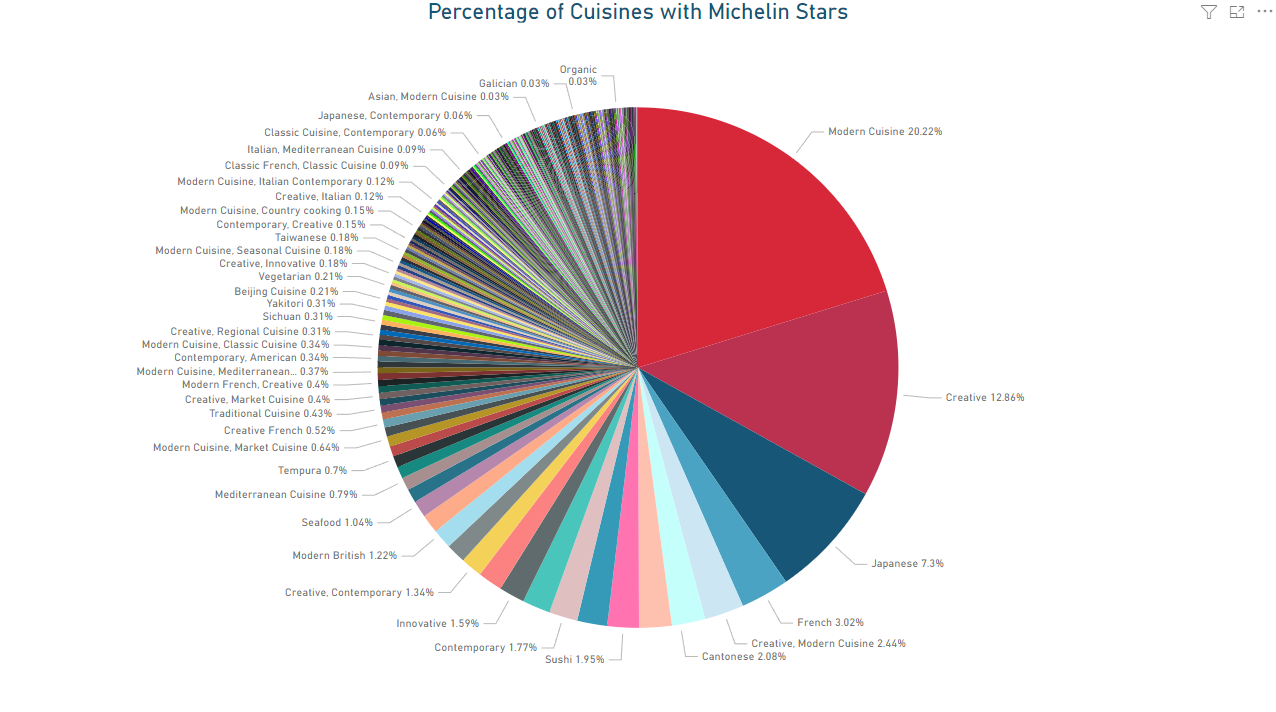 

It's a clear winner, but there's so many little things that this dataset could improve on. Firstly, there are so many cuisines listed and some restaurants have multiple cuisines featured. Some could be Creative _and_ Modern Cuisine, which could potentially skew the data. Secondly, there are some cuisines that are lesser known that could be a branch of the main cuisine, such as Sushi and Kaiseki being branches of Japanese cuisine. If we were to analyze cuisines, there should be more generalized titles being used so that we aren't excluding them from being a part of the larger percentage.  

So does being popular mean the cuisine is considered "good"? Not necessarily.  This question allowed me to explore an experiment to take a look at the top cuisines and see what the average amount of stars earned was. This experiment was a good way to try to put a number to words as I turned the number of stars into actual nmbers and performed calculations on them, which to me felt a but unorthodox. 

Based <span style="color: var(--vscode-foreground);">on the findings,&nbsp;</span>   <span style="color: var(--vscode-foreground);">I was able to narrow down the fact that Modern Cuisine had the most restaurants but not the highest average number of stars. In fact, it was the also highly regarded Creative cuisine that was the clear winner with almost 1.5 stars at every Creative restaurant. This shows the importance of sample size and how it allows us to better tell what the averages would be.&nbsp;</span>   

<span style="color: var(--vscode-foreground);"><br></span>  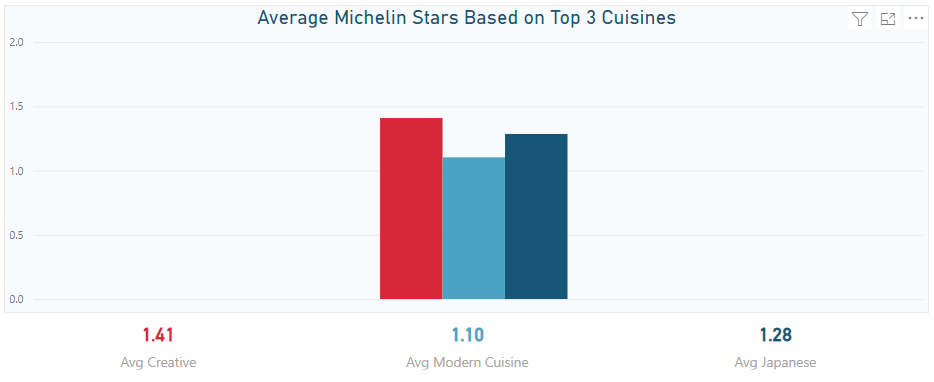

### **<span style="color: var(--vscode-foreground);">What are the average prices like for each type of distinction? and Does price level affect level of distinction earned?</span>**

These two questions actually go hand in hand as we would need to find the averages in order to look at the level of distinction earned. Since the dataset only provided Min and Max prices, we need to find the average of the two, which was easily achieved by finding the mean. Once all the restaurants had a middle ground price, we were able to better tell how the averages of the averages looked on a higher level. 

  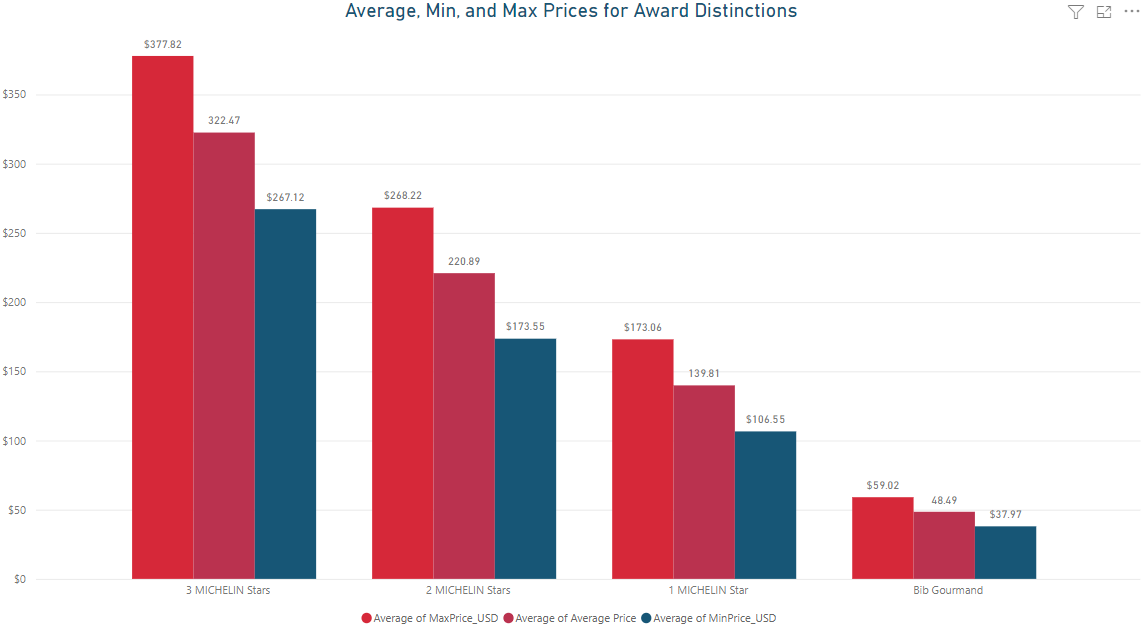 

It's so interesting to see how the average prices of the restaurants with Michelin stars seemd to follow a rigid price level as if one minimum is the next one's max. I tried to dive into this to look at the price ranges without overlap to see if we could categorize awards into specific price ranges, such as $0-$100 for Bib Gourmand and $101 - $200 for 1 Michelin Star and on. It was not a success as the percentage of restaurants that actually belonged to those categories did not resemble a majority. At most, it was only about 50% or so, which means that there are so many other restaurants that does not fall into a specific range and could be quite drastic from the rest.  That's where the pricing presents us with many errors that is not accounted in the dataset. What do the min and max prices even mean? Do they represent the cheapest option such as sides or do the most expensive items represent just add ons? The pricing is ambiguous, but so are restaurants. Some restaurants might have tasting menus and some restaurants might have extremely high prices just for one dish. Since this is not specified, it's hard to say that some restaurants are more worth it than others.  

Since the pricing isn't on the same level, such as a la carte vs set menus, we can't compare apples to apples. Even the averages might be skewed as it's not truly representative of the rest of the restaurant's menu. The high price of a single dish couuld drive up the average price of a restaurant, which makes it unreliable. Going forward, we would have to scan the prices on the menu of all restaurants for it to be accurate. It might be time consuming, but if we want sound data, looking at all aspects is ideal. 

### **<span style="color: var(--vscode-foreground);">Which restaurants are most "bang for your buck"?</span>**

Lastly, we look at the idea of value, which is a tricky subject as assigning value to something is always subjective. Someone might feel that other restaurants are more worth it than others based on price, location, cuisine, and just personal taste. Assigning a factor to taste is impossible as it is ever changing and different to all eaters. Nonetheless, we needed to compare all restaurants' prices in USD to get a better understanding of what is easily accessible and what is a good price for the distinction level. So I looked at the price points as a starting point. If a restaurant was cheaper than its award average, it should be clear that you are getting good food of that distinction at a price that is way less than the averages.  As a reminder: 

- 1 Michelin Star: 1466/2660 = 55.11% of values below average
- 2 Michelin Stars: 250/477 = 52.41% of values below average
- 3 Michelin Stars: 71/137 = 51.82% of values below average
- Bib Gourmand: 1504/3251 = 46.26% below average And if we graphed this and put the average as the limit, this is what the prices look like for each award for restaurants below the average price:

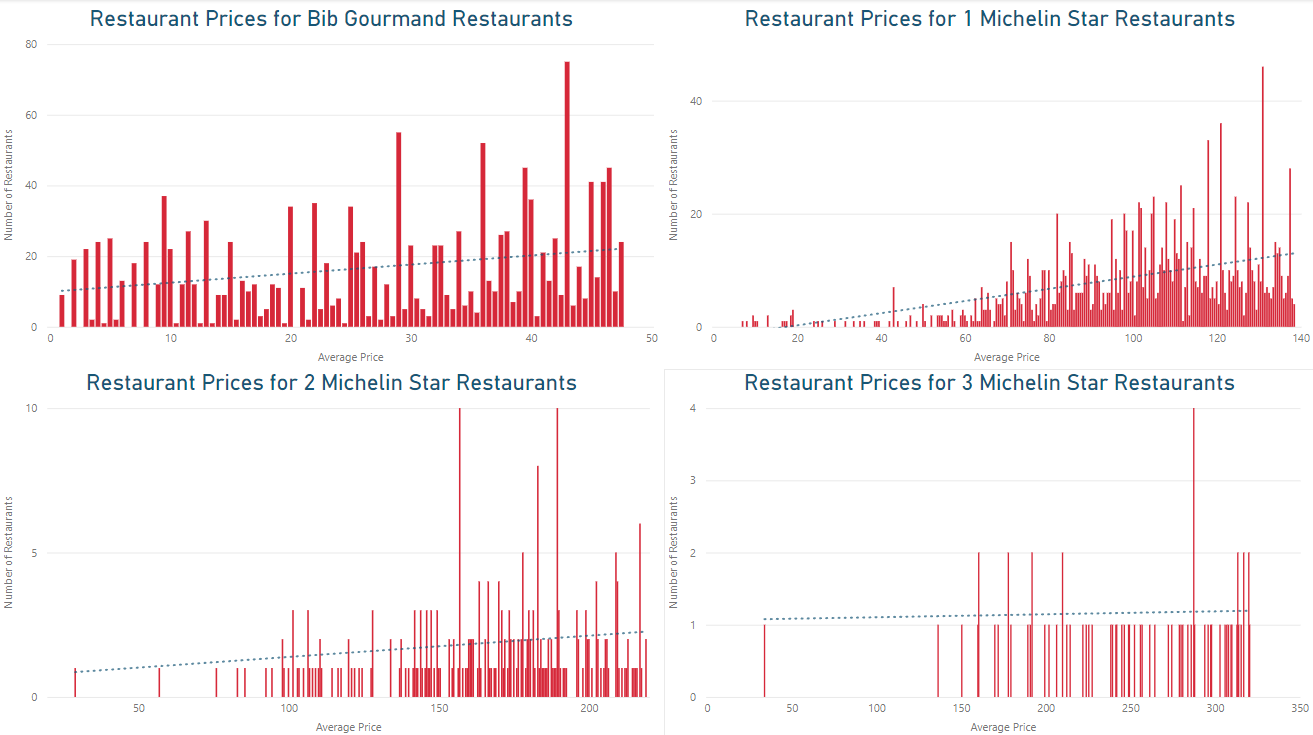

  
There are some pretty key differences in these charts as Bib Gourmand is more even spread out but for restaurants with Michelin Stars, they are skewed towards the right, being closer to the average price.  It might be easy to tell that since Bib Gourmand is better spread out, it might be easier to find restaurants that fits people's budgets more and could be a category worth exploring. However, if we look at the graph for 1 Michelin Stars, we see that there are so many more restaurants that fall below the average, which means you can find more of those restaurants and thus fulfills the accessibility factor. If we factor in price for that level vs the Bib Gourmand average ($140 for 1 Michelin Star and $50 for Bib Gourmand), we notice that the gap is quite large. For those that have a higher salary or spending freedom, they might lean towards 1 Michelin star restaurants since that is within their spending range. However, those that aren't as wealthy might prefer Bib Gourmand restaurants and that will be of high value to them.  

From my standpoint, I am a bit biased as once I tried a 1 Michelin star restaurant, I knew that the experience for me was worth it. Food is subjective and might not hold high importance for everyone, which is understandable and completely rational. It's hard to assign numbers to taste, and there's no guarantee that 1 Michelin Star food is 3 times better than Bib Gourmand food, which would then maybe make it worth visiting. However, I deducted that due to accessibility and personal experience, going to a Michelin starred restaurant is definitely worth the price--even if it is just once. It's not every day that you eat such high quality cooking, but it's understandable to see it from a variety of standpoints.  

Moving forward, I would love to explore this again and take into account a variety of things from ongoing currency exchange rates to a deeper look at the pricing of these menus so that we can get a better understanding of the actual pricing. I definitely learned a lot about the different aspects of restaurants in the Michelin Guide, but there's a lot to improve on. My next step would be to try some of these places out and determine if it is worth it.